In [1]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
from lcls_beamline_toolbox.xraybeamline2d import beam1d as beam, optics1d as optics, beamline1d as beamline

In [6]:
N = 4096
FOV = 10e-3
dx = FOV/N

E0 = 9500

beam_params = {
    'photonEnergy': E0,
    'N': N,
    'sigma_x': 15e-6,
    'sigma_y': 15e-6,
    'z0x': 110,
    'z0y': 110,
    'rangeFactor': 5,
    'scaleFactor': 20,
    'z_source': 630
}

In [7]:
b1 = beam.Beam(beam_params=beam_params)

mr1l0 = optics.FlatMirror('mr1l0', length=1, alpha=2.1e-3, z=740,delta=0e-9)
mr2l0 = optics.FlatMirror('mr2l0', length=1, alpha=2.1e-3, z=747.286, orientation=2)

alphaAsym = 5*np.pi/180

# slit = optics.Slit('slit', z=989.9, x_width=20e-6, y_width=500e-6)
entrance_slit = optics.Slit('entrance', z=989, x_width=.5e-3, y_width=.5e-3)

crystal1 = optics.Crystal('c1', hkl=[2,2,0], length=1e-2, width=10e-3, z=990, E0=E0,
                          alphaAsym=0, orientation=2,pol='p')

# should be orientation 0
crystal2 = optics.Crystal('c2', hkl=[2,2,0], length=1e-2, width=10e-3, z=990.012, E0=E0,alphaAsym=alphaAsym, 
                          orientation=0,pol='p')
crystal3 = optics.Crystal('c3', hkl=[2,2,0], length=1e-2, width=10e-3, z=990.112, E0=E0,alphaAsym=-alphaAsym, 
                          orientation=0, asym_type='emergence',pol='p')
# should be orientation 0
crystal4 = optics.Crystal('c4', hkl=[2,2,0], length=1e-2, width=10e-3, z=990.124, E0=E0,alphaAsym=0, 
                          asym_type='emergence', orientation=2,pol='p')
# crystal5 = optics.Crystal('c1', hkl=[2,2,0], length=1.5e-2, z=792, E0=9500,alphaAsym=0*np.pi/180, 
#                           orientation=0)

# print('b: %.2f' % crystal2.b)

crl1 = optics.CRL('crlx', z=990.15, roc=7e-6)
crl2 = optics.CRL('crly', z=990.15,orientation=1, roc=7e-6)
slit = optics.Slit('slit', z=990.2, x_width=500e-6, y_width=500e-6)

# print(crystal.alpha*180/np.pi)
# print(crystal.beta0*180/np.pi)
print((np.sin(crystal2.beta0)/np.sin(crystal2.alpha)))
print(crystal4.alpha*180/np.pi)
# print(crystal5.alpha*180/np.pi)
print(crystal4.beta0*180/np.pi)

# Stack of 20 CRLs for tight focus
# crl_list = []
# for i in range(20):
#     crl_list.append(optics.CRL('crl%d' % i, z=800+i*1e-3,dx=0e-6, ))

IP = optics.PPM('IP', FOV=50e-6, z=991.08, N=256)
upstream_YAG = optics.PPM('YAG1',FOV=1e-3,z=entrance_slit.z + .05, N=256)

# YAG_mid = optics.PPM('YAG_mid',FOV=30e-3,z=990.2, N=256)

downstream_YAG = optics.PPM('YAG2',FOV=1e-3,z=crystal4.z + 4, N=256)
# downstream_YAG = optics.PPM('YAG', FOV=3e-3, z=803, N=256)

# devices = [mr1l0,mr2l0,upstream_YAG]
devices = [mr1l0,mr2l0,entrance_slit,upstream_YAG, IP,downstream_YAG, crystal1,crystal2,crystal3,crystal4, slit]
# devices = devices + crl_list

XPP = beamline.Beamline(devices)

k_ix = -np.sin(crystal1.alpha)
k_iy = np.sin(0)
# k_iz = np.sqrt(1 - k_ix ** 2 - k_iy ** 2)
k_iz = np.cos(crystal1.alpha)
k_i = np.array([k_ix,k_iy,k_iz])

print(crystal2.rotation_crystal(k_i, b1.lambda0))
print(crystal1.crystal.get_Darwin_width(14410))

FWHM in x: 359.96254102061795 microns
FWHM in y: 359.96254102061795 microns
FWHM Divergence (x): 3.3 μrad
FWHM Divergence (y): 3.3 μrad
5.415447013748533
5.415447013748533
b 1.00
b 1.64
b 0.61
b 1.00
0.6102211874545929
19.86913187055027
19.869131870550262
after mr1l0: 0.00
after mr2l0: 0.00
after c1: -0.69
after c2: 0.00
after c3: 0.69
after c4: 0.00
(array([-0.23255746,  0.        ,  0.03319926]), array([0.02406745, 0.        , 0.99971034]))
1.3620401788281523e-05


In [8]:
print(crystal2.alpha)

0.43404492398595806


In [9]:
print(mr1l0.global_x)
print(mr1l0.global_alpha)
print(mr2l0.global_x)
print(mr2l0.global_alpha)
print(crystal1.global_x)
print(crystal1.global_alpha)
print(crystal2.global_x)
print(crystal2.global_alpha)
print(crystal3.global_x)
print(crystal3.global_alpha)
print(crystal4.global_x)
print(crystal4.global_alpha)

0
0.0021
0.030601379936325394
0.0021
0.030601379936325394
-0.346781770654042
0.020625242862907543
-0.2595186173221258
0.02062623496876823
0.2595306524099044
0.03060251960041145
0.3467890417726059


mr1l0
zx: 110.00
zy: 110.00
azimuth 4.20 mrad
drift1
delta z: -0.00
zx: 117.29
zy: 117.29
azimuth 4.20 mrad
mr2l0
zx: 117.29
zy: 117.29
azimuth -0.00 mrad
drift2
delta z: 0.00
zx: 359.00
zy: 359.00
azimuth -0.00 mrad
entrance
zx: 359.00
zy: 359.00
azimuth -0.00 mrad
drift3
delta z: 0.00
zx: 359.05
zy: 359.05
azimuth -0.00 mrad
YAG1
zx: 359.05
zy: 359.05
azimuth -0.00 mrad
drift4
delta z: 0.00
zx: 360.00
zy: 360.00
azimuth -0.00 mrad
c1
zx: 360.00
zy: 360.00
azimuth -693.56 mrad
drift5
delta z: -0.00
zx: 360.02
zy: 360.02
azimuth -693.56 mrad
c2
zx: 134.06
zy: 360.02
azimuth 0.01 mrad
drift6
delta z: -0.00
zx: 134.16
zy: 360.12
azimuth 0.01 mrad
c3
zx: 360.30
zy: 360.12
azimuth 693.57 mrad
drift7
delta z: -0.00
zx: 360.31
zy: 360.13
azimuth 693.57 mrad
c4
zx: 360.31
zy: 360.13
azimuth 0.01 mrad
drift8
delta z: 0.00
zx: 360.39
zy: 360.21
azimuth 0.01 mrad
slit
zx: 360.39
zy: 360.21
azimuth 0.01 mrad
drift9
delta z: 0.00
zx: 361.27
zy: 361.09
azimuth 0.01 mrad
IP
zx: 361.27
zy: 361.09
azi

<IPython.core.display.Javascript object>


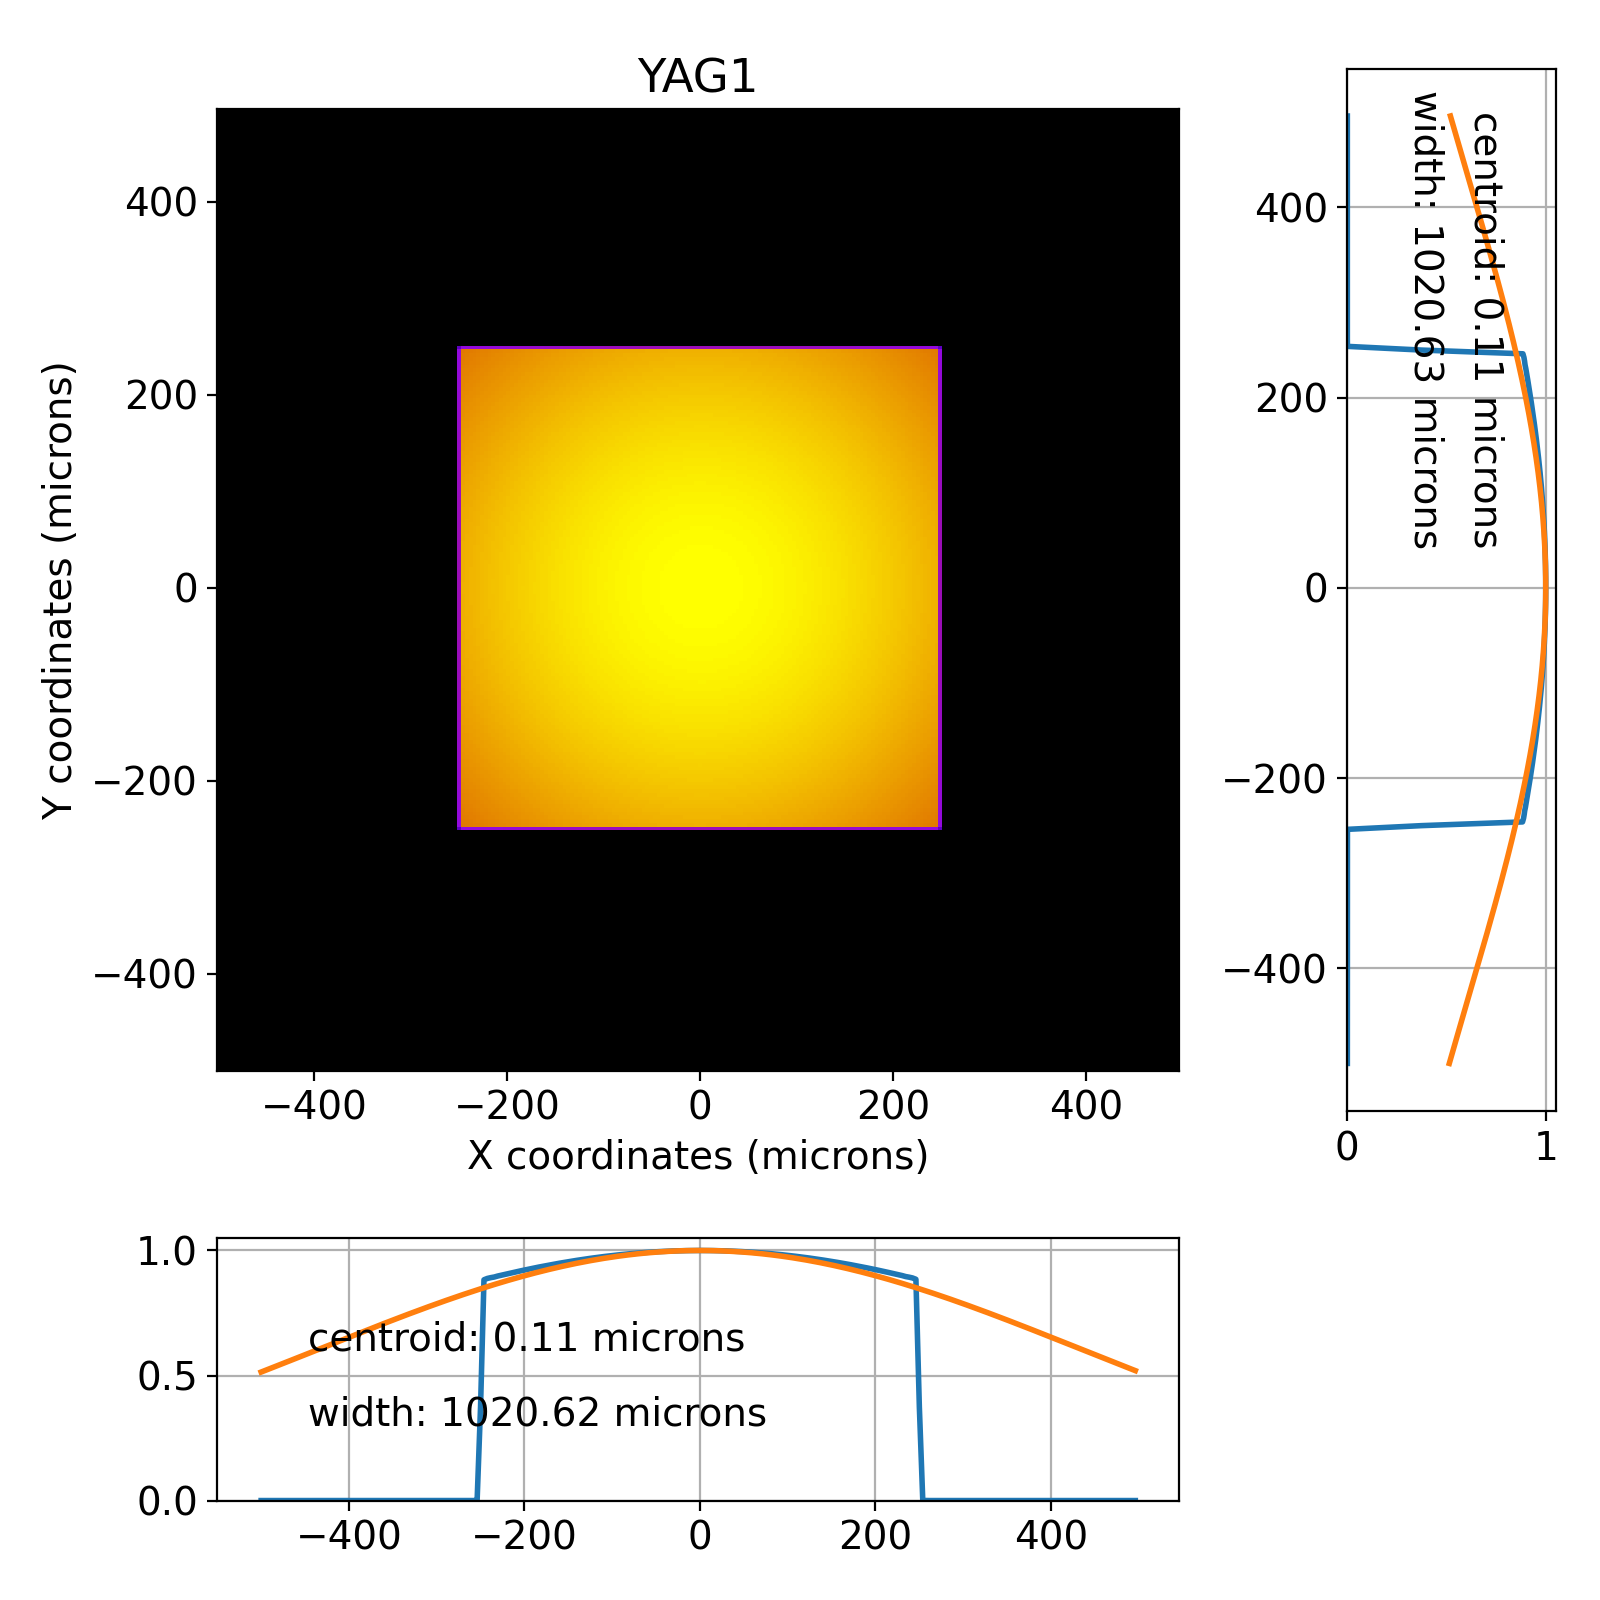

<IPython.core.display.Javascript object>


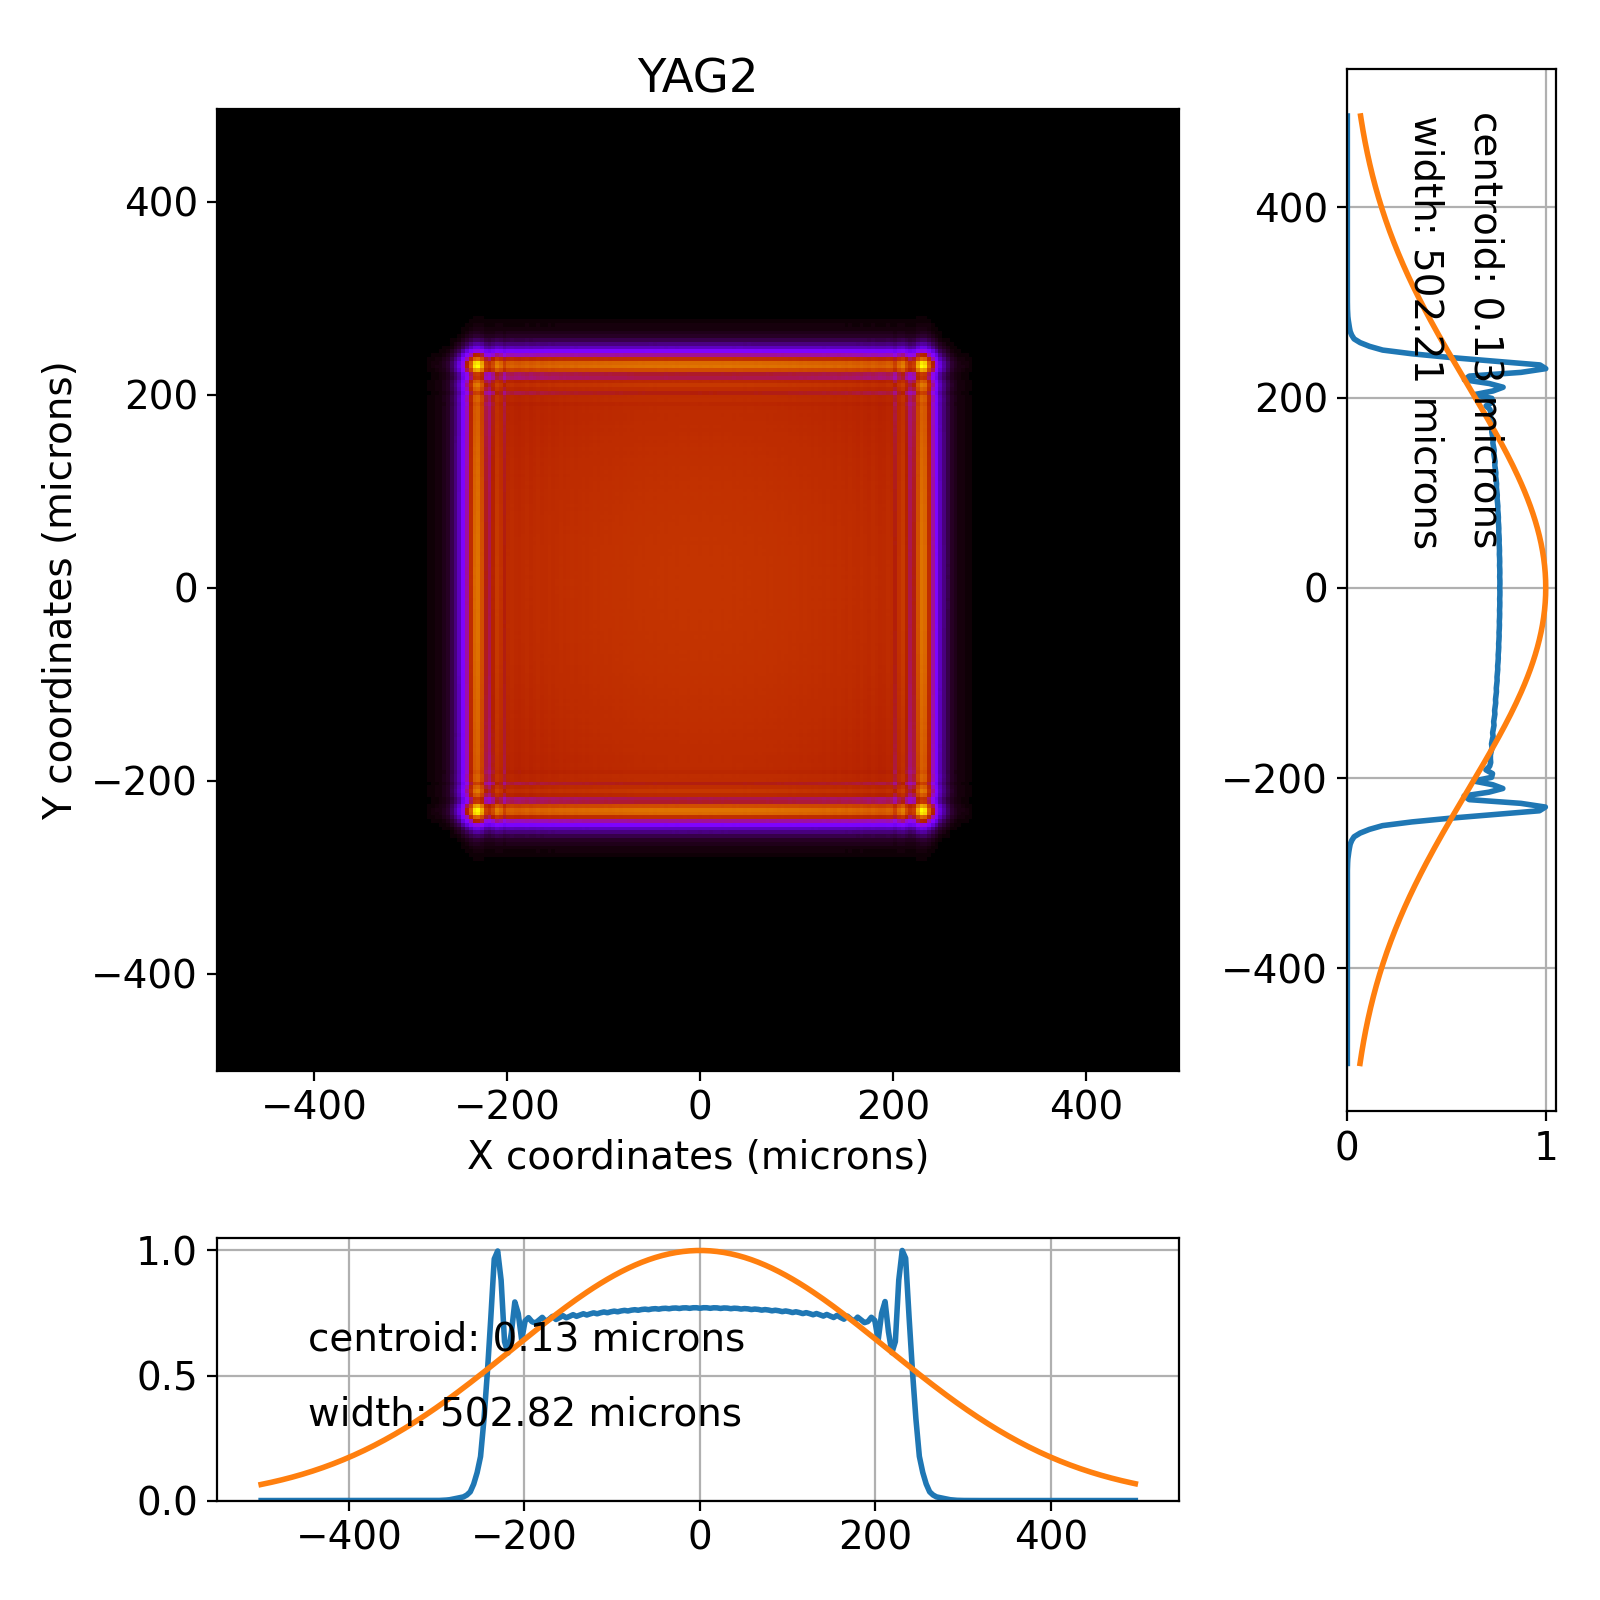

<IPython.core.display.Javascript object>


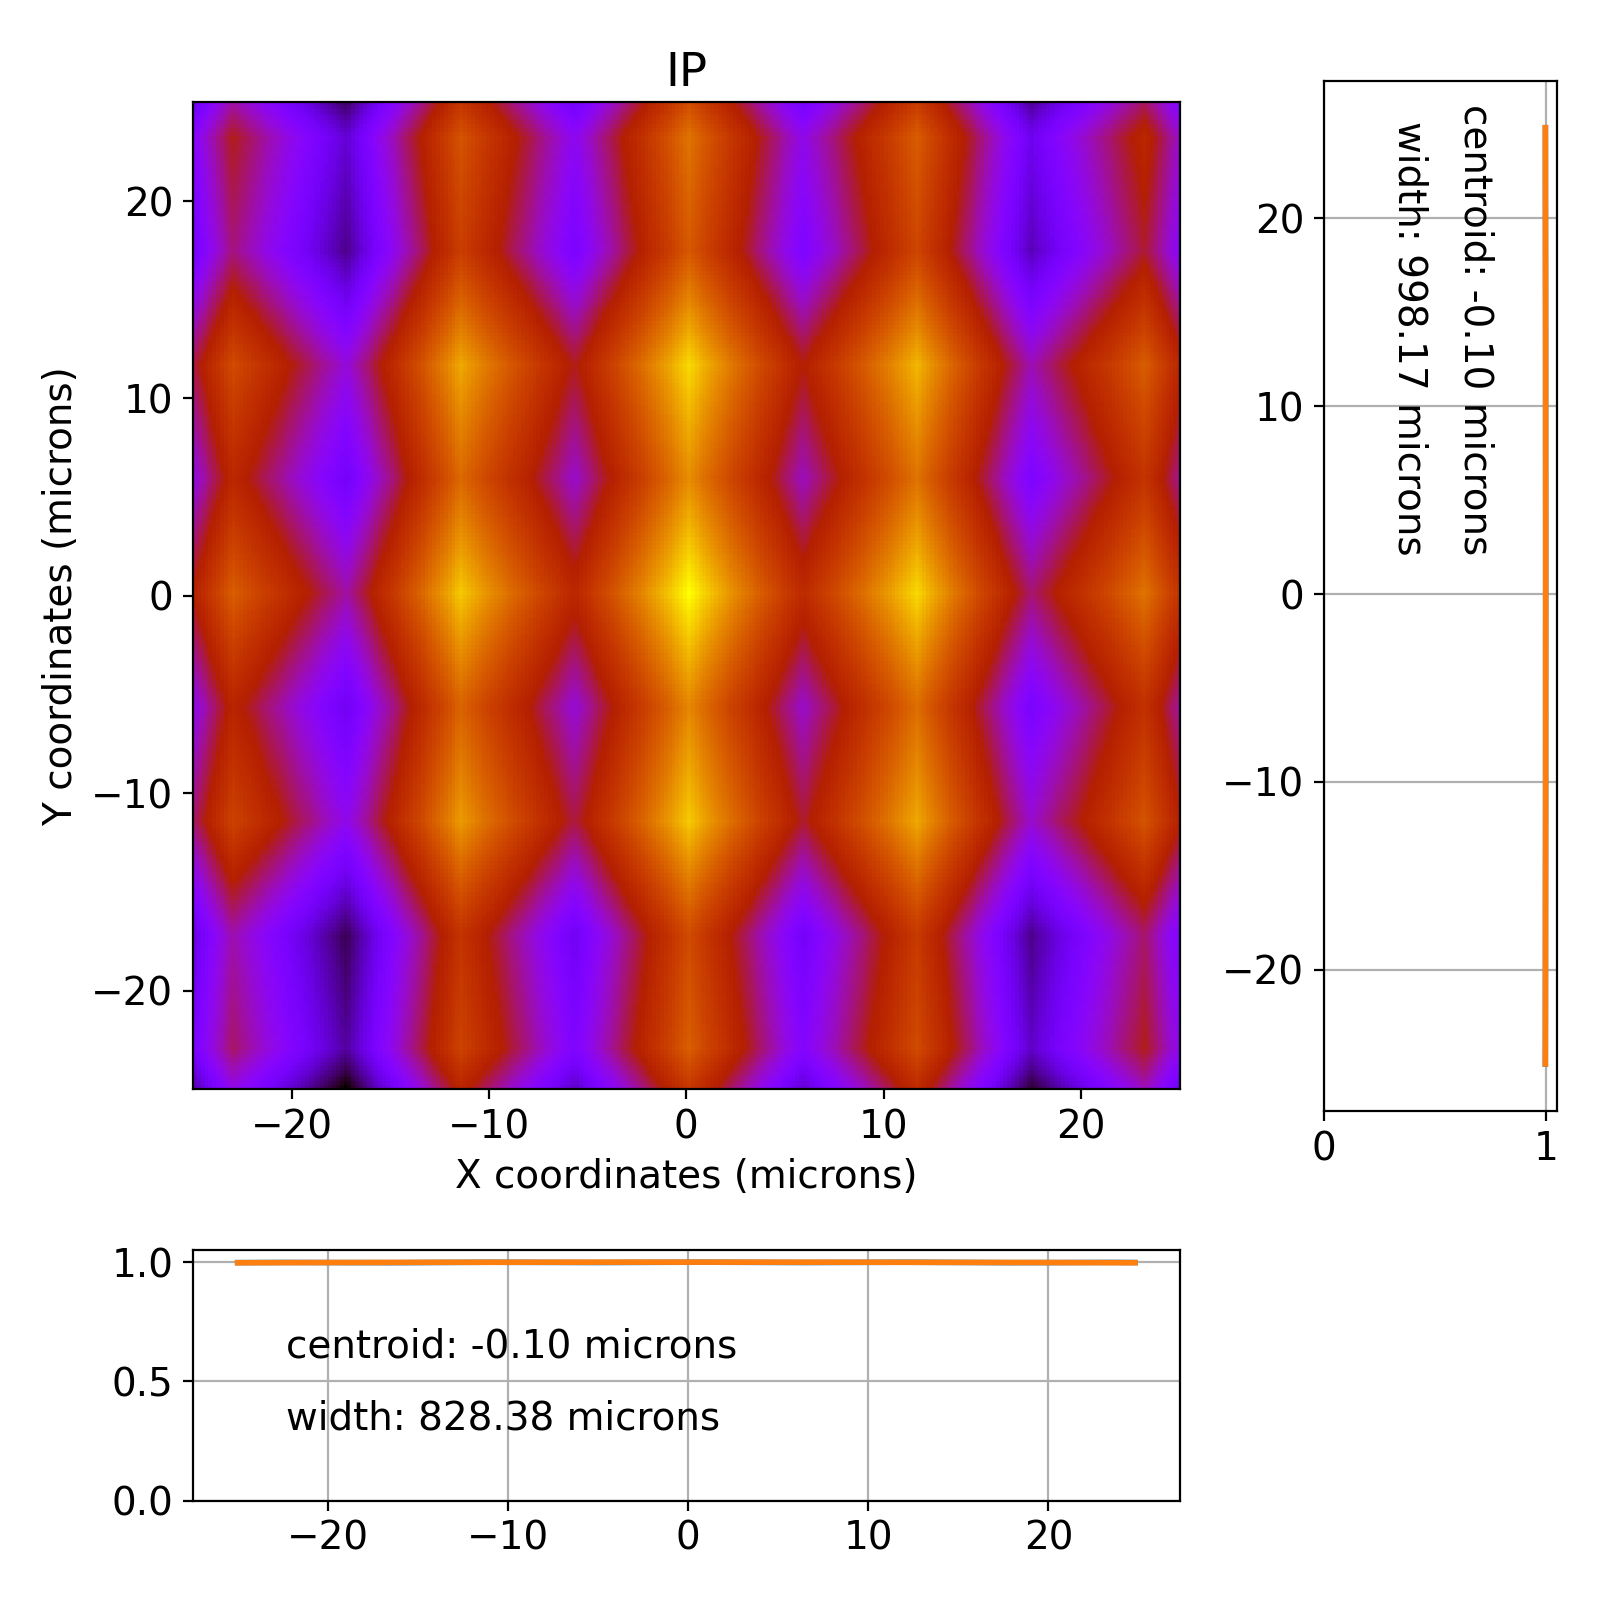

<IPython.core.display.Javascript object>


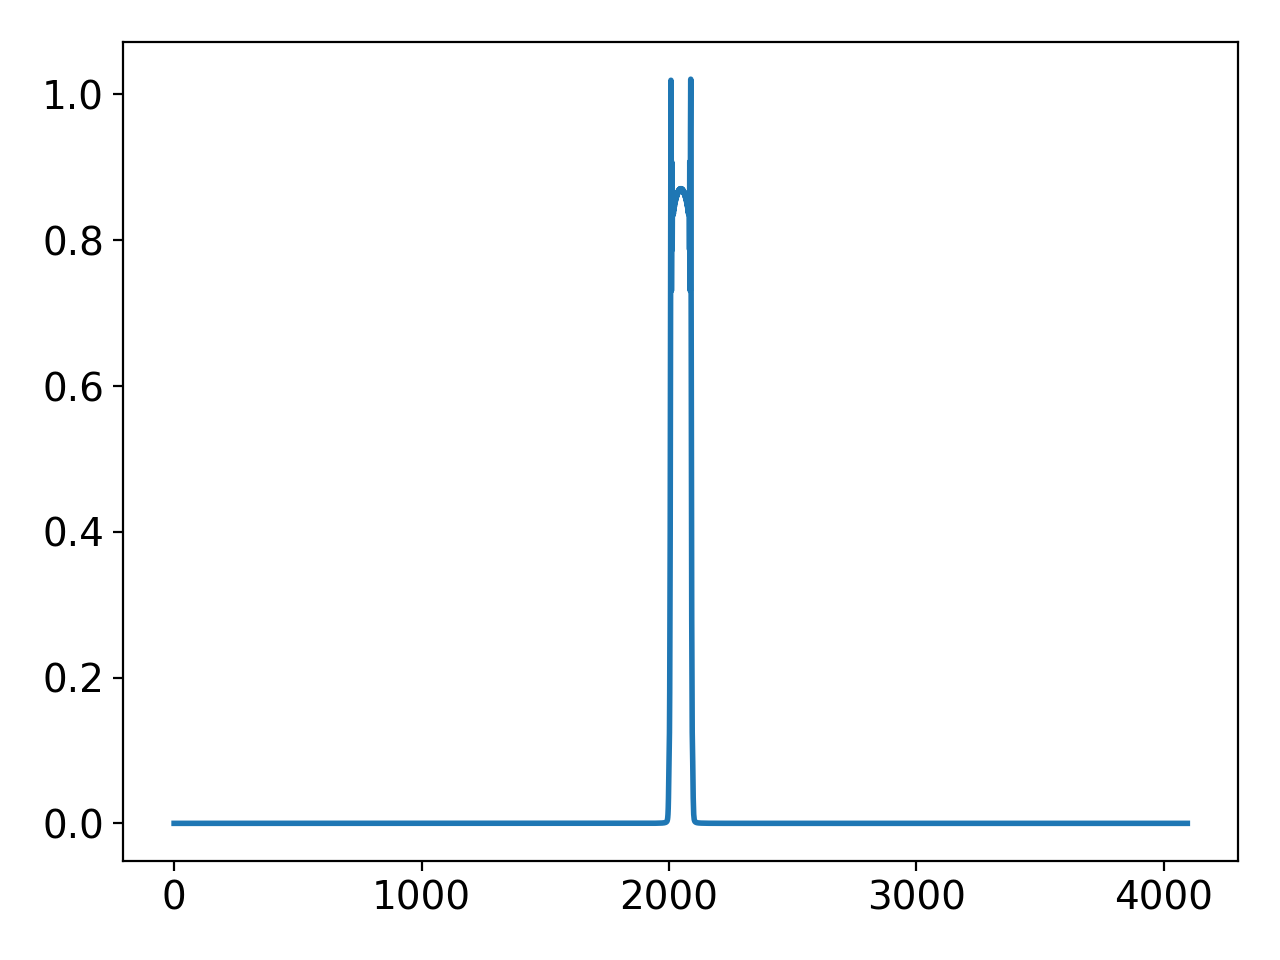

In [10]:
b2 = XPP.propagate_beamline(b1)
XPP.YAG1.view_beam()
# XPP.IP.view_beam()
XPP.YAG2.view_beam()
# XPP.YAG_mid.view_beam()
XPP.IP.view_beam()
# XPP.YAG.view_beam()
plt.figure()
plt.plot(np.abs(b2.wavex))

In [11]:
beam_params['photonEnergy'] = 9500

pulse_test = beam.Pulse(beam_params=beam_params, tau=5, time_window=1000)

In [12]:
pulse_test.propagate(beamline=XPP, screen_names=['YAG2','YAG1'])

FWHM in x: 359.9976963997878 microns
FWHM in y: 359.9976963997878 microns
FWHM Divergence (x): 3.3 μrad
FWHM Divergence (y): 3.3 μrad
5.414916889636518
5.414916889636518
mr1l0
zx: 110.00
zy: 110.00
azimuth 4.20 mrad
drift1
delta z: 0.00
zx: 117.29
zy: 117.29
azimuth 4.20 mrad
mr2l0
zx: 117.29
zy: 117.29
azimuth -0.00 mrad
drift2
delta z: 0.00
zx: 359.00
zy: 359.00
azimuth -0.00 mrad
entrance
zx: 359.00
zy: 359.00
azimuth -0.00 mrad
drift3
delta z: 0.00
zx: 359.05
zy: 359.05
azimuth -0.00 mrad
YAG1
zx: 359.05
zy: 359.05
azimuth -0.00 mrad
drift4
delta z: 0.00
zx: 360.00
zy: 360.00
azimuth -0.00 mrad
c1
zx: 360.00
zy: 360.00
azimuth -693.56 mrad
drift5
delta z: 0.00
zx: 360.02
zy: 360.02
azimuth -693.56 mrad
c2
zx: 134.04
zy: 360.02
azimuth -0.01 mrad
drift6
delta z: -8.51
zx: 134.14
zy: 360.12
azimuth -0.01 mrad
c3
zx: 360.22
zy: 360.12
azimuth 693.60 mrad
drift7
delta z: -3.45
zx: 360.23
zy: 360.13
azimuth 693.60 mrad
c4
zx: 360.23
zy: 360.13
azimuth -0.02 mrad
drift8
delta z: 11.44
zx

zx: 360.22
zy: 360.12
azimuth 693.60 mrad
drift7
delta z: 0.02
zx: 360.24
zy: 360.13
azimuth 693.60 mrad
c4
zx: 360.24
zy: 360.13
azimuth -0.02 mrad
drift8
delta z: -0.05
zx: 360.31
zy: 360.21
azimuth -0.02 mrad
slit
zx: 360.31
zy: 360.21
azimuth -0.02 mrad
drift9
delta z: -0.00
zx: 361.19
zy: 361.09
azimuth -0.02 mrad
IP
zx: 361.19
zy: 361.09
azimuth -0.02 mrad
drift10
delta z: -0.00
zx: 364.24
zy: 364.13
azimuth -0.02 mrad
YAG2
zx: 364.24
zy: 364.13
azimuth -0.02 mrad
FWHM in x: 359.99659768986993 microns
FWHM in y: 359.99659768986993 microns
FWHM Divergence (x): 3.3 μrad
FWHM Divergence (y): 3.3 μrad
5.414933456015018
5.414933456015018
mr1l0
zx: 110.00
zy: 110.00
azimuth 4.20 mrad
drift1
delta z: 0.00
zx: 117.29
zy: 117.29
azimuth 4.20 mrad
mr2l0
zx: 117.29
zy: 117.29
azimuth -0.00 mrad
drift2
delta z: 0.00
zx: 359.00
zy: 359.00
azimuth -0.00 mrad
entrance
zx: 359.00
zy: 359.00
azimuth -0.00 mrad
drift3
delta z: 0.00
zx: 359.05
zy: 359.05
azimuth -0.00 mrad
YAG1
zx: 359.05
zy: 359.0

zx: 364.24
zy: 364.13
azimuth -0.02 mrad
FWHM in x: 359.99565594386905 microns
FWHM in y: 359.99565594386905 microns
FWHM Divergence (x): 3.3 μrad
FWHM Divergence (y): 3.3 μrad
5.414947655768018
5.414947655768018
mr1l0
zx: 110.00
zy: 110.00
azimuth 4.20 mrad
drift1
delta z: 0.00
zx: 117.29
zy: 117.29
azimuth 4.20 mrad
mr2l0
zx: 117.29
zy: 117.29
azimuth -0.00 mrad
drift2
delta z: 0.00
zx: 359.00
zy: 359.00
azimuth -0.00 mrad
entrance
zx: 359.00
zy: 359.00
azimuth -0.00 mrad
drift3
delta z: 0.00
zx: 359.05
zy: 359.05
azimuth -0.00 mrad
YAG1
zx: 359.05
zy: 359.05
azimuth -0.00 mrad
drift4
delta z: 0.00
zx: 360.00
zy: 360.00
azimuth -0.00 mrad
c1
zx: 360.00
zy: 360.00
azimuth -693.56 mrad
drift5
delta z: 0.00
zx: 360.02
zy: 360.02
azimuth -693.56 mrad
c2
zx: 134.04
zy: 360.02
azimuth -0.01 mrad
drift6
delta z: 0.04
zx: 134.14
zy: 360.12
azimuth -0.01 mrad
c3
zx: 360.22
zy: 360.12
azimuth 693.60 mrad
drift7
delta z: 0.02
zx: 360.24
zy: 360.13
azimuth 693.60 mrad
c4
zx: 360.24
zy: 360.13
az

zx: 117.29
zy: 117.29
azimuth 4.20 mrad
mr2l0
zx: 117.29
zy: 117.29
azimuth -0.00 mrad
drift2
delta z: 0.00
zx: 359.00
zy: 359.00
azimuth -0.00 mrad
entrance
zx: 359.00
zy: 359.00
azimuth -0.00 mrad
drift3
delta z: 0.00
zx: 359.05
zy: 359.05
azimuth -0.00 mrad
YAG1
zx: 359.05
zy: 359.05
azimuth -0.00 mrad
drift4
delta z: 0.00
zx: 360.00
zy: 360.00
azimuth -0.00 mrad
c1
zx: 360.00
zy: 360.00
azimuth -693.56 mrad
drift5
delta z: 0.00
zx: 360.02
zy: 360.02
azimuth -693.56 mrad
c2
zx: 134.04
zy: 360.02
azimuth -0.01 mrad
drift6
delta z: 0.04
zx: 134.14
zy: 360.12
azimuth -0.01 mrad
c3
zx: 360.23
zy: 360.12
azimuth 693.60 mrad
drift7
delta z: 0.02
zx: 360.24
zy: 360.13
azimuth 693.60 mrad
c4
zx: 360.24
zy: 360.13
azimuth -0.02 mrad
drift8
delta z: -0.05
zx: 360.32
zy: 360.21
azimuth -0.02 mrad
slit
zx: 360.32
zy: 360.21
azimuth -0.02 mrad
drift9
delta z: -0.00
zx: 361.20
zy: 361.09
azimuth -0.02 mrad
IP
zx: 361.20
zy: 361.09
azimuth -0.02 mrad
drift10
delta z: -0.00
zx: 364.24
zy: 364.13
az

zx: 360.24
zy: 360.13
azimuth -0.02 mrad
drift8
delta z: -0.05
zx: 360.32
zy: 360.21
azimuth -0.02 mrad
slit
zx: 360.32
zy: 360.21
azimuth -0.02 mrad
drift9
delta z: -0.00
zx: 361.20
zy: 361.09
azimuth -0.02 mrad
IP
zx: 361.20
zy: 361.09
azimuth -0.02 mrad
drift10
delta z: -0.00
zx: 364.24
zy: 364.13
azimuth -0.02 mrad
YAG2
zx: 364.24
zy: 364.13
azimuth -0.02 mrad
FWHM in x: 359.9931446453756 microns
FWHM in y: 359.9931446453756 microns
FWHM Divergence (x): 3.3 μrad
FWHM Divergence (y): 3.3 μrad
5.41498552177602
5.41498552177602
mr1l0
zx: 110.00
zy: 110.00
azimuth 4.20 mrad
drift1
delta z: 0.00
zx: 117.29
zy: 117.29
azimuth 4.20 mrad
mr2l0
zx: 117.29
zy: 117.29
azimuth -0.00 mrad
drift2
delta z: 0.00
zx: 359.00
zy: 359.00
azimuth -0.00 mrad
entrance
zx: 359.00
zy: 359.00
azimuth -0.00 mrad
drift3
delta z: 0.00
zx: 359.05
zy: 359.05
azimuth -0.00 mrad
YAG1
zx: 359.05
zy: 359.05
azimuth -0.00 mrad
drift4
delta z: 0.00
zx: 360.00
zy: 360.00
azimuth -0.00 mrad
c1
zx: 360.00
zy: 360.00
azim

zx: 359.05
zy: 359.05
azimuth -0.00 mrad
YAG1
zx: 359.05
zy: 359.05
azimuth -0.00 mrad
drift4
delta z: 0.00
zx: 360.00
zy: 360.00
azimuth -0.00 mrad
c1
zx: 360.00
zy: 360.00
azimuth -693.56 mrad
drift5
delta z: 0.00
zx: 360.02
zy: 360.02
azimuth -693.56 mrad
c2
zx: 134.04
zy: 360.02
azimuth -0.01 mrad
drift6
delta z: 0.04
zx: 134.14
zy: 360.12
azimuth -0.01 mrad
c3
zx: 360.23
zy: 360.12
azimuth 693.59 mrad
drift7
delta z: 0.02
zx: 360.25
zy: 360.13
azimuth 693.59 mrad
c4
zx: 360.25
zy: 360.13
azimuth -0.02 mrad
drift8
delta z: -0.05
zx: 360.32
zy: 360.21
azimuth -0.02 mrad
slit
zx: 360.32
zy: 360.21
azimuth -0.02 mrad
drift9
delta z: -0.00
zx: 361.20
zy: 361.09
azimuth -0.02 mrad
IP
zx: 361.20
zy: 361.09
azimuth -0.02 mrad
drift10
delta z: -0.00
zx: 364.25
zy: 364.13
azimuth -0.02 mrad
YAG2
zx: 364.25
zy: 364.13
azimuth -0.02 mrad
FWHM in x: 359.9915751016743 microns
FWHM in y: 359.9915751016743 microns
FWHM Divergence (x): 3.3 μrad
FWHM Divergence (y): 3.3 μrad
5.4150091880310205
5.41

zx: 361.21
zy: 361.09
azimuth -0.01 mrad
drift10
delta z: -0.00
zx: 364.25
zy: 364.13
azimuth -0.01 mrad
YAG2
zx: 364.25
zy: 364.13
azimuth -0.01 mrad
FWHM in x: 359.9906333820466 microns
FWHM in y: 359.9906333820466 microns
FWHM Divergence (x): 3.3 μrad
FWHM Divergence (y): 3.3 μrad
5.4150233877840215
5.4150233877840215
mr1l0
zx: 110.00
zy: 110.00
azimuth 4.20 mrad
drift1
delta z: 0.00
zx: 117.29
zy: 117.29
azimuth 4.20 mrad
mr2l0
zx: 117.29
zy: 117.29
azimuth -0.00 mrad
drift2
delta z: 0.00
zx: 359.00
zy: 359.00
azimuth -0.00 mrad
entrance
zx: 359.00
zy: 359.00
azimuth -0.00 mrad
drift3
delta z: 0.00
zx: 359.05
zy: 359.05
azimuth -0.00 mrad
YAG1
zx: 359.05
zy: 359.05
azimuth -0.00 mrad
drift4
delta z: 0.00
zx: 360.00
zy: 360.00
azimuth -0.00 mrad
c1
zx: 360.00
zy: 360.00
azimuth -693.56 mrad
drift5
delta z: 0.00
zx: 360.02
zy: 360.02
azimuth -693.56 mrad
c2
zx: 134.04
zy: 360.02
azimuth -0.01 mrad
drift6
delta z: 0.04
zx: 134.14
zy: 360.12
azimuth -0.01 mrad
c3
zx: 360.23
zy: 360.12


zx: 117.29
zy: 117.29
azimuth -0.00 mrad
drift2
delta z: 0.00
zx: 359.00
zy: 359.00
azimuth -0.00 mrad
entrance
zx: 359.00
zy: 359.00
azimuth -0.00 mrad
drift3
delta z: 0.00
zx: 359.05
zy: 359.05
azimuth -0.00 mrad
YAG1
zx: 359.05
zy: 359.05
azimuth -0.00 mrad
drift4
delta z: 0.00
zx: 360.00
zy: 360.00
azimuth -0.00 mrad
c1
zx: 360.00
zy: 360.00
azimuth -693.56 mrad
drift5
delta z: 0.00
zx: 360.02
zy: 360.02
azimuth -693.56 mrad
c2
zx: 134.04
zy: 360.02
azimuth -0.01 mrad
drift6
delta z: 0.04
zx: 134.14
zy: 360.12
azimuth -0.01 mrad
c3
zx: 360.24
zy: 360.12
azimuth 693.59 mrad
drift7
delta z: 0.02
zx: 360.25
zy: 360.13
azimuth 693.59 mrad
c4
zx: 360.25
zy: 360.13
azimuth -0.01 mrad
drift8
delta z: -0.05
zx: 360.33
zy: 360.21
azimuth -0.01 mrad
slit
zx: 360.33
zy: 360.21
azimuth -0.01 mrad
drift9
delta z: -0.00
zx: 361.21
zy: 361.09
azimuth -0.01 mrad
IP
zx: 361.21
zy: 361.09
azimuth -0.01 mrad
drift10
delta z: -0.00
zx: 364.25
zy: 364.13
azimuth -0.01 mrad
YAG2
zx: 364.25
zy: 364.13
az

zx: 360.33
zy: 360.21
azimuth -0.01 mrad
slit
zx: 360.33
zy: 360.21
azimuth -0.01 mrad
drift9
delta z: -0.00
zx: 361.21
zy: 361.09
azimuth -0.01 mrad
IP
zx: 361.21
zy: 361.09
azimuth -0.01 mrad
drift10
delta z: -0.00
zx: 364.26
zy: 364.13
azimuth -0.01 mrad
YAG2
zx: 364.26
zy: 364.13
azimuth -0.01 mrad
FWHM in x: 359.9881221538812 microns
FWHM in y: 359.9881221538812 microns
FWHM Divergence (x): 3.3 μrad
FWHM Divergence (y): 3.3 μrad
5.415061253792023
5.415061253792023
mr1l0
zx: 110.00
zy: 110.00
azimuth 4.20 mrad
drift1
delta z: 0.00
zx: 117.29
zy: 117.29
azimuth 4.20 mrad
mr2l0
zx: 117.29
zy: 117.29
azimuth -0.00 mrad
drift2
delta z: 0.00
zx: 359.00
zy: 359.00
azimuth -0.00 mrad
entrance
zx: 359.00
zy: 359.00
azimuth -0.00 mrad
drift3
delta z: 0.00
zx: 359.05
zy: 359.05
azimuth -0.00 mrad
YAG1
zx: 359.05
zy: 359.05
azimuth -0.00 mrad
drift4
delta z: 0.00
zx: 360.00
zy: 360.00
azimuth -0.00 mrad
c1
zx: 360.00
zy: 360.00
azimuth -693.56 mrad
drift5
delta z: 0.00
zx: 360.02
zy: 360.02
a

zx: 359.05
zy: 359.05
azimuth -0.00 mrad
drift4
delta z: 0.00
zx: 360.00
zy: 360.00
azimuth -0.00 mrad
c1
zx: 360.00
zy: 360.00
azimuth -693.56 mrad
drift5
delta z: 0.00
zx: 360.02
zy: 360.02
azimuth -693.56 mrad
c2
zx: 134.04
zy: 360.02
azimuth -0.01 mrad
drift6
delta z: 0.04
zx: 134.14
zy: 360.12
azimuth -0.01 mrad
c3
zx: 360.24
zy: 360.12
azimuth 693.59 mrad
drift7
delta z: 0.02
zx: 360.26
zy: 360.13
azimuth 693.59 mrad
c4
zx: 360.26
zy: 360.13
azimuth -0.01 mrad
drift8
delta z: -0.05
zx: 360.33
zy: 360.21
azimuth -0.01 mrad
slit
zx: 360.33
zy: 360.21
azimuth -0.01 mrad
drift9
delta z: -0.00
zx: 361.21
zy: 361.09
azimuth -0.01 mrad
IP
zx: 361.21
zy: 361.09
azimuth -0.01 mrad
drift10
delta z: -0.00
zx: 364.26
zy: 364.13
azimuth -0.01 mrad
YAG2
zx: 364.26
zy: 364.13
azimuth -0.01 mrad
FWHM in x: 359.9865526541341 microns
FWHM in y: 359.9865526541341 microns
FWHM Divergence (x): 3.3 μrad
FWHM Divergence (y): 3.3 μrad
5.415084920047022
5.415084920047022
mr1l0
zx: 110.00
zy: 110.00
azimu

zx: 360.02
zy: 360.02
azimuth -693.56 mrad
c2
zx: 134.04
zy: 360.02
azimuth -0.00 mrad
drift6
delta z: 0.04
zx: 134.14
zy: 360.12
azimuth -0.00 mrad
c3
zx: 360.25
zy: 360.12
azimuth 693.59 mrad
drift7
delta z: 0.02
zx: 360.26
zy: 360.13
azimuth 693.59 mrad
c4
zx: 360.26
zy: 360.13
azimuth -0.01 mrad
drift8
delta z: -0.05
zx: 360.34
zy: 360.21
azimuth -0.01 mrad
slit
zx: 360.34
zy: 360.21
azimuth -0.01 mrad
drift9
delta z: -0.00
zx: 361.22
zy: 361.09
azimuth -0.01 mrad
IP
zx: 361.22
zy: 361.09
azimuth -0.01 mrad
drift10
delta z: -0.00
zx: 364.26
zy: 364.13
azimuth -0.01 mrad
YAG2
zx: 364.26
zy: 364.13
azimuth -0.01 mrad
FWHM in x: 359.9851401161051 microns
FWHM in y: 359.9851401161051 microns
FWHM Divergence (x): 3.3 μrad
FWHM Divergence (y): 3.3 μrad
5.415106219676524
5.415106219676524
mr1l0
zx: 110.00
zy: 110.00
azimuth 4.20 mrad
drift1
delta z: 0.00
zx: 117.29
zy: 117.29
azimuth 4.20 mrad
mr2l0
zx: 117.29
zy: 117.29
azimuth -0.00 mrad
drift2
delta z: 0.00
zx: 359.00
zy: 359.00
azimut

mr1l0
zx: 110.00
zy: 110.00
azimuth 4.20 mrad
drift1
delta z: 0.00
zx: 117.29
zy: 117.29
azimuth 4.20 mrad
mr2l0
zx: 117.29
zy: 117.29
azimuth -0.00 mrad
drift2
delta z: 0.00
zx: 359.00
zy: 359.00
azimuth -0.00 mrad
entrance
zx: 359.00
zy: 359.00
azimuth -0.00 mrad
drift3
delta z: 0.00
zx: 359.05
zy: 359.05
azimuth -0.00 mrad
YAG1
zx: 359.05
zy: 359.05
azimuth -0.00 mrad
drift4
delta z: 0.00
zx: 360.00
zy: 360.00
azimuth -0.00 mrad
c1
zx: 360.00
zy: 360.00
azimuth -693.56 mrad
drift5
delta z: 0.00
zx: 360.02
zy: 360.02
azimuth -693.56 mrad
c2
zx: 134.04
zy: 360.02
azimuth -0.00 mrad
drift6
delta z: 0.04
zx: 134.14
zy: 360.12
azimuth -0.00 mrad
c3
zx: 360.25
zy: 360.12
azimuth 693.59 mrad
drift7
delta z: 0.02
zx: 360.26
zy: 360.13
azimuth 693.59 mrad
c4
zx: 360.26
zy: 360.13
azimuth -0.01 mrad
drift8
delta z: -0.05
zx: 360.34
zy: 360.21
azimuth -0.01 mrad
slit
zx: 360.34
zy: 360.21
azimuth -0.01 mrad
drift9
delta z: -0.00
zx: 361.22
zy: 361.09
azimuth -0.01 mrad
IP
zx: 361.22
zy: 361.09

zx: 360.34
zy: 360.21
azimuth -0.01 mrad
slit
zx: 360.34
zy: 360.21
azimuth -0.01 mrad
drift9
delta z: -0.00
zx: 361.22
zy: 361.09
azimuth -0.01 mrad
IP
zx: 361.22
zy: 361.09
azimuth -0.01 mrad
drift10
delta z: -0.00
zx: 364.27
zy: 364.13
azimuth -0.01 mrad
YAG2
zx: 364.27
zy: 364.13
azimuth -0.01 mrad
FWHM in x: 359.98309980303804 microns
FWHM in y: 359.98309980303804 microns
FWHM Divergence (x): 3.3 μrad
FWHM Divergence (y): 3.3 μrad
5.415136985808024
5.415136985808024
mr1l0
zx: 110.00
zy: 110.00
azimuth 4.20 mrad
drift1
delta z: 0.00
zx: 117.29
zy: 117.29
azimuth 4.20 mrad
mr2l0
zx: 117.29
zy: 117.29
azimuth -0.00 mrad
drift2
delta z: 0.00
zx: 359.00
zy: 359.00
azimuth -0.00 mrad
entrance
zx: 359.00
zy: 359.00
azimuth -0.00 mrad
drift3
delta z: 0.00
zx: 359.05
zy: 359.05
azimuth -0.00 mrad
YAG1
zx: 359.05
zy: 359.05
azimuth -0.00 mrad
drift4
delta z: 0.00
zx: 360.00
zy: 360.00
azimuth -0.00 mrad
c1
zx: 360.00
zy: 360.00
azimuth -693.56 mrad
drift5
delta z: 0.00
zx: 360.02
zy: 360.02

zx: 117.29
zy: 117.29
azimuth 4.20 mrad
mr2l0
zx: 117.29
zy: 117.29
azimuth -0.00 mrad
drift2
delta z: 0.00
zx: 359.00
zy: 359.00
azimuth -0.00 mrad
entrance
zx: 359.00
zy: 359.00
azimuth -0.00 mrad
drift3
delta z: 0.00
zx: 359.05
zy: 359.05
azimuth -0.00 mrad
YAG1
zx: 359.05
zy: 359.05
azimuth -0.00 mrad
drift4
delta z: 0.00
zx: 360.00
zy: 360.00
azimuth -0.00 mrad
c1
zx: 360.00
zy: 360.00
azimuth -693.56 mrad
drift5
delta z: 0.00
zx: 360.02
zy: 360.02
azimuth -693.56 mrad
c2
zx: 134.05
zy: 360.02
azimuth -0.00 mrad
drift6
delta z: 0.04
zx: 134.15
zy: 360.12
azimuth -0.00 mrad
c3
zx: 360.25
zy: 360.12
azimuth 693.59 mrad
drift7
delta z: 0.02
zx: 360.27
zy: 360.13
azimuth 693.59 mrad
c4
zx: 360.27
zy: 360.13
azimuth -0.01 mrad
drift8
delta z: -0.05
zx: 360.35
zy: 360.21
azimuth -0.01 mrad
slit
zx: 360.35
zy: 360.21
azimuth -0.01 mrad
drift9
delta z: -0.00
zx: 361.23
zy: 361.09
azimuth -0.01 mrad
IP
zx: 361.23
zy: 361.09
azimuth -0.01 mrad
drift10
delta z: -0.00
zx: 364.27
zy: 364.13
az

zx: 361.23
zy: 361.09
azimuth -0.01 mrad
drift10
delta z: -0.00
zx: 364.27
zy: 364.13
azimuth -0.01 mrad
YAG2
zx: 364.27
zy: 364.13
azimuth -0.01 mrad
FWHM in x: 359.981059513183 microns
FWHM in y: 359.981059513183 microns
FWHM Divergence (x): 3.3 μrad
FWHM Divergence (y): 3.3 μrad
5.415167751939525
5.415167751939525
mr1l0
zx: 110.00
zy: 110.00
azimuth 4.20 mrad
drift1
delta z: 0.00
zx: 117.29
zy: 117.29
azimuth 4.20 mrad
mr2l0
zx: 117.29
zy: 117.29
azimuth -0.00 mrad
drift2
delta z: 0.00
zx: 359.00
zy: 359.00
azimuth -0.00 mrad
entrance
zx: 359.00
zy: 359.00
azimuth -0.00 mrad
drift3
delta z: 0.00
zx: 359.05
zy: 359.05
azimuth -0.00 mrad
YAG1
zx: 359.05
zy: 359.05
azimuth -0.00 mrad
drift4
delta z: 0.00
zx: 360.00
zy: 360.00
azimuth -0.00 mrad
c1
zx: 360.00
zy: 360.00
azimuth -693.56 mrad
drift5
delta z: 0.00
zx: 360.02
zy: 360.02
azimuth -693.56 mrad
c2
zx: 134.05
zy: 360.02
azimuth -0.00 mrad
drift6
delta z: 0.04
zx: 134.15
zy: 360.12
azimuth -0.00 mrad
c3
zx: 360.26
zy: 360.12
azim

zx: 360.00
zy: 360.00
azimuth -0.00 mrad
c1
zx: 360.00
zy: 360.00
azimuth -693.56 mrad
drift5
delta z: 0.00
zx: 360.02
zy: 360.02
azimuth -693.56 mrad
c2
zx: 134.05
zy: 360.02
azimuth -0.00 mrad
drift6
delta z: 0.04
zx: 134.15
zy: 360.12
azimuth -0.00 mrad
c3
zx: 360.26
zy: 360.12
azimuth 693.58 mrad
drift7
delta z: 0.02
zx: 360.27
zy: 360.13
azimuth 693.58 mrad
c4
zx: 360.27
zy: 360.13
azimuth -0.01 mrad
drift8
delta z: -0.05
zx: 360.35
zy: 360.21
azimuth -0.01 mrad
slit
zx: 360.35
zy: 360.21
azimuth -0.01 mrad
drift9
delta z: -0.00
zx: 361.23
zy: 361.09
azimuth -0.01 mrad
IP
zx: 361.23
zy: 361.09
azimuth -0.01 mrad
drift10
delta z: -0.00
zx: 364.27
zy: 364.13
azimuth -0.01 mrad
YAG2
zx: 364.27
zy: 364.13
azimuth -0.01 mrad
FWHM in x: 359.97996090518285 microns
FWHM in y: 359.97996090518285 microns
FWHM Divergence (x): 3.3 μrad
FWHM Divergence (y): 3.3 μrad
5.415184318318027
5.415184318318027
mr1l0
zx: 110.00
zy: 110.00
azimuth 4.20 mrad
drift1
delta z: 0.00
zx: 117.29
zy: 117.29
azim

FWHM in x: 359.97901924653945 microns
FWHM in y: 359.97901924653945 microns
FWHM Divergence (x): 3.3 μrad
FWHM Divergence (y): 3.3 μrad
5.415198518071026
5.415198518071026
mr1l0
zx: 110.00
zy: 110.00
azimuth 4.20 mrad
drift1
delta z: 0.00
zx: 117.29
zy: 117.29
azimuth 4.20 mrad
mr2l0
zx: 117.29
zy: 117.29
azimuth -0.00 mrad
drift2
delta z: 0.00
zx: 359.00
zy: 359.00
azimuth -0.00 mrad
entrance
zx: 359.00
zy: 359.00
azimuth -0.00 mrad
drift3
delta z: 0.00
zx: 359.05
zy: 359.05
azimuth -0.00 mrad
YAG1
zx: 359.05
zy: 359.05
azimuth -0.00 mrad
drift4
delta z: 0.00
zx: 360.00
zy: 360.00
azimuth -0.00 mrad
c1
zx: 360.00
zy: 360.00
azimuth -693.56 mrad
drift5
delta z: 0.00
zx: 360.02
zy: 360.02
azimuth -693.56 mrad
c2
zx: 134.05
zy: 360.02
azimuth -0.00 mrad
drift6
delta z: 0.04
zx: 134.15
zy: 360.12
azimuth -0.00 mrad
c3
zx: 360.26
zy: 360.12
azimuth 693.58 mrad
drift7
delta z: 0.02
zx: 360.28
zy: 360.13
azimuth 693.58 mrad
c4
zx: 360.28
zy: 360.13
azimuth -0.01 mrad
drift8
delta z: -0.05
zx

zx: 134.15
zy: 360.12
azimuth -0.00 mrad
c3
zx: 360.26
zy: 360.12
azimuth 693.58 mrad
drift7
delta z: 0.02
zx: 360.28
zy: 360.13
azimuth 693.58 mrad
c4
zx: 360.28
zy: 360.13
azimuth -0.00 mrad
drift8
delta z: -0.05
zx: 360.35
zy: 360.21
azimuth -0.00 mrad
slit
zx: 360.35
zy: 360.21
azimuth -0.00 mrad
drift9
delta z: -0.00
zx: 361.23
zy: 361.09
azimuth -0.00 mrad
IP
zx: 361.23
zy: 361.09
azimuth -0.00 mrad
drift10
delta z: -0.00
zx: 364.28
zy: 364.13
azimuth -0.00 mrad
YAG2
zx: 364.28
zy: 364.13
azimuth -0.00 mrad
FWHM in x: 359.9779206510379 microns
FWHM in y: 359.9779206510379 microns
FWHM Divergence (x): 3.3 μrad
FWHM Divergence (y): 3.3 μrad
5.415215084449526
5.415215084449526
mr1l0
zx: 110.00
zy: 110.00
azimuth 4.20 mrad
drift1
delta z: 0.00
zx: 117.29
zy: 117.29
azimuth 4.20 mrad
mr2l0
zx: 117.29
zy: 117.29
azimuth -0.00 mrad
drift2
delta z: 0.00
zx: 359.00
zy: 359.00
azimuth -0.00 mrad
entrance
zx: 359.00
zy: 359.00
azimuth -0.00 mrad
drift3
delta z: 0.00
zx: 359.05
zy: 359.05
az

mr1l0
zx: 110.00
zy: 110.00
azimuth 4.20 mrad
drift1
delta z: 0.00
zx: 117.29
zy: 117.29
azimuth 4.20 mrad
mr2l0
zx: 117.29
zy: 117.29
azimuth -0.00 mrad
drift2
delta z: 0.00
zx: 359.00
zy: 359.00
azimuth -0.00 mrad
entrance
zx: 359.00
zy: 359.00
azimuth -0.00 mrad
drift3
delta z: 0.00
zx: 359.05
zy: 359.05
azimuth -0.00 mrad
YAG1
zx: 359.05
zy: 359.05
azimuth -0.00 mrad
drift4
delta z: 0.00
zx: 360.00
zy: 360.00
azimuth -0.00 mrad
c1
zx: 360.00
zy: 360.00
azimuth -693.56 mrad
drift5
delta z: 0.00
zx: 360.02
zy: 360.02
azimuth -693.56 mrad
c2
zx: 134.05
zy: 360.02
azimuth 0.00 mrad
drift6
delta z: 0.04
zx: 134.15
zy: 360.12
azimuth 0.00 mrad
c3
zx: 360.27
zy: 360.12
azimuth 693.58 mrad
drift7
delta z: 0.02
zx: 360.28
zy: 360.13
azimuth 693.58 mrad
c4
zx: 360.28
zy: 360.13
azimuth -0.00 mrad
drift8
delta z: -0.05
zx: 360.36
zy: 360.21
azimuth -0.00 mrad
slit
zx: 360.36
zy: 360.21
azimuth -0.00 mrad
drift9
delta z: -0.00
zx: 361.24
zy: 361.09
azimuth -0.00 mrad
IP
zx: 361.24
zy: 361.09
a

zx: 360.28
zy: 360.13
azimuth -0.00 mrad
drift8
delta z: -0.05
zx: 360.36
zy: 360.21
azimuth -0.00 mrad
slit
zx: 360.36
zy: 360.21
azimuth -0.00 mrad
drift9
delta z: -0.00
zx: 361.24
zy: 361.09
azimuth -0.00 mrad
IP
zx: 361.24
zy: 361.09
azimuth -0.00 mrad
drift10
delta z: -0.00
zx: 364.28
zy: 364.13
azimuth -0.00 mrad
YAG2
zx: 364.28
zy: 364.13
azimuth -0.00 mrad
FWHM in x: 359.9758804201038 microns
FWHM in y: 359.9758804201038 microns
FWHM Divergence (x): 3.3 μrad
FWHM Divergence (y): 3.3 μrad
5.415245850581028
5.415245850581028
mr1l0
zx: 110.00
zy: 110.00
azimuth 4.20 mrad
drift1
delta z: 0.00
zx: 117.29
zy: 117.29
azimuth 4.20 mrad
mr2l0
zx: 117.29
zy: 117.29
azimuth -0.00 mrad
drift2
delta z: 0.00
zx: 359.00
zy: 359.00
azimuth -0.00 mrad
entrance
zx: 359.00
zy: 359.00
azimuth -0.00 mrad
drift3
delta z: 0.00
zx: 359.05
zy: 359.05
azimuth -0.00 mrad
YAG1
zx: 359.05
zy: 359.05
azimuth -0.00 mrad
drift4
delta z: 0.00
zx: 360.00
zy: 360.00
azimuth -0.00 mrad
c1
zx: 360.00
zy: 360.00
az

mr1l0
zx: 110.00
zy: 110.00
azimuth 4.20 mrad
drift1
delta z: 0.00
zx: 117.29
zy: 117.29
azimuth 4.20 mrad
mr2l0
zx: 117.29
zy: 117.29
azimuth -0.00 mrad
drift2
delta z: 0.00
zx: 359.00
zy: 359.00
azimuth -0.00 mrad
entrance
zx: 359.00
zy: 359.00
azimuth -0.00 mrad
drift3
delta z: 0.00
zx: 359.05
zy: 359.05
azimuth -0.00 mrad
YAG1
zx: 359.05
zy: 359.05
azimuth -0.00 mrad
drift4
delta z: 0.00
zx: 360.00
zy: 360.00
azimuth -0.00 mrad
c1
zx: 360.00
zy: 360.00
azimuth -693.56 mrad
drift5
delta z: 0.00
zx: 360.02
zy: 360.02
azimuth -693.56 mrad
c2
zx: 134.05
zy: 360.02
azimuth 0.00 mrad
drift6
delta z: 0.04
zx: 134.15
zy: 360.12
azimuth 0.00 mrad
c3
zx: 360.27
zy: 360.12
azimuth 693.58 mrad
drift7
delta z: 0.02
zx: 360.29
zy: 360.13
azimuth 693.58 mrad
c4
zx: 360.29
zy: 360.13
azimuth -0.00 mrad
drift8
delta z: -0.05
zx: 360.36
zy: 360.21
azimuth -0.00 mrad
slit
zx: 360.36
zy: 360.21
azimuth -0.00 mrad
drift9
delta z: -0.00
zx: 361.24
zy: 361.09
azimuth -0.00 mrad
IP
zx: 361.24
zy: 361.09
a

zx: 360.02
zy: 360.02
azimuth -693.56 mrad
c2
zx: 134.05
zy: 360.02
azimuth 0.00 mrad
drift6
delta z: 0.04
zx: 134.15
zy: 360.12
azimuth 0.00 mrad
c3
zx: 360.27
zy: 360.12
azimuth 693.58 mrad
drift7
delta z: 0.02
zx: 360.29
zy: 360.13
azimuth 693.58 mrad
c4
zx: 360.29
zy: 360.13
azimuth -0.00 mrad
drift8
delta z: -0.05
zx: 360.36
zy: 360.21
azimuth -0.00 mrad
slit
zx: 360.36
zy: 360.21
azimuth -0.00 mrad
drift9
delta z: -0.00
zx: 361.24
zy: 361.09
azimuth -0.00 mrad
IP
zx: 361.24
zy: 361.09
azimuth -0.00 mrad
drift10
delta z: -0.00
zx: 364.29
zy: 364.13
azimuth -0.00 mrad
YAG2
zx: 364.29
zy: 364.13
azimuth -0.00 mrad
FWHM in x: 359.9733693985094 microns
FWHM in y: 359.9733693985094 microns
FWHM Divergence (x): 3.3 μrad
FWHM Divergence (y): 3.3 μrad
5.4152837165890295
5.4152837165890295
mr1l0
zx: 110.00
zy: 110.00
azimuth 4.20 mrad
drift1
delta z: 0.00
zx: 117.29
zy: 117.29
azimuth 4.20 mrad
mr2l0
zx: 117.29
zy: 117.29
azimuth -0.00 mrad
drift2
delta z: 0.00
zx: 359.00
zy: 359.00
azimut

zx: 360.29
zy: 360.13
azimuth -0.00 mrad
drift8
delta z: -0.05
zx: 360.37
zy: 360.21
azimuth -0.00 mrad
slit
zx: 360.37
zy: 360.21
azimuth -0.00 mrad
drift9
delta z: -0.00
zx: 361.25
zy: 361.09
azimuth -0.00 mrad
IP
zx: 361.25
zy: 361.09
azimuth -0.00 mrad
drift10
delta z: -0.00
zx: 364.29
zy: 364.13
azimuth -0.00 mrad
YAG2
zx: 364.29
zy: 364.13
azimuth -0.00 mrad
FWHM in x: 359.97195696431305 microns
FWHM in y: 359.97195696431305 microns
FWHM Divergence (x): 3.3 μrad
FWHM Divergence (y): 3.3 μrad
5.4153050162185306
5.4153050162185306
mr1l0
zx: 110.00
zy: 110.00
azimuth 4.20 mrad
drift1
delta z: 0.00
zx: 117.29
zy: 117.29
azimuth 4.20 mrad
mr2l0
zx: 117.29
zy: 117.29
azimuth -0.00 mrad
drift2
delta z: 0.00
zx: 359.00
zy: 359.00
azimuth -0.00 mrad
entrance
zx: 359.00
zy: 359.00
azimuth -0.00 mrad
drift3
delta z: 0.00
zx: 359.05
zy: 359.05
azimuth -0.00 mrad
YAG1
zx: 359.05
zy: 359.05
azimuth -0.00 mrad
drift4
delta z: 0.00
zx: 360.00
zy: 360.00
azimuth -0.00 mrad
c1
zx: 360.00
zy: 360.0

zx: 359.05
zy: 359.05
azimuth -0.00 mrad
YAG1
zx: 359.05
zy: 359.05
azimuth -0.00 mrad
drift4
delta z: 0.00
zx: 360.00
zy: 360.00
azimuth -0.00 mrad
c1
zx: 360.00
zy: 360.00
azimuth -693.56 mrad
drift5
delta z: 0.00
zx: 360.02
zy: 360.02
azimuth -693.56 mrad
c2
zx: 134.05
zy: 360.02
azimuth 0.00 mrad
drift6
delta z: 0.04
zx: 134.15
zy: 360.12
azimuth 0.00 mrad
c3
zx: 360.28
zy: 360.12
azimuth 693.58 mrad
drift7
delta z: 0.02
zx: 360.29
zy: 360.13
azimuth 693.58 mrad
c4
zx: 360.29
zy: 360.13
azimuth 0.00 mrad
drift8
delta z: -0.05
zx: 360.37
zy: 360.21
azimuth 0.00 mrad
slit
zx: 360.37
zy: 360.21
azimuth 0.00 mrad
drift9
delta z: 0.00
zx: 361.25
zy: 361.09
azimuth 0.00 mrad
IP
zx: 361.25
zy: 361.09
azimuth 0.00 mrad
drift10
delta z: 0.00
zx: 364.29
zy: 364.13
azimuth 0.00 mrad
YAG2
zx: 364.29
zy: 364.13
azimuth 0.00 mrad
FWHM in x: 359.9708584120736 microns
FWHM in y: 359.9708584120736 microns
FWHM Divergence (x): 3.3 μrad
FWHM Divergence (y): 3.3 μrad
5.41532158259703
5.41532158259703


zx: 364.30
zy: 364.13
azimuth 0.00 mrad
YAG2
zx: 364.30
zy: 364.13
azimuth 0.00 mrad
FWHM in x: 359.9699168012242 microns
FWHM in y: 359.9699168012242 microns
FWHM Divergence (x): 3.3 μrad
FWHM Divergence (y): 3.3 μrad
5.415335782350032
5.415335782350032
mr1l0
zx: 110.00
zy: 110.00
azimuth 4.20 mrad
drift1
delta z: 0.00
zx: 117.29
zy: 117.29
azimuth 4.20 mrad
mr2l0
zx: 117.29
zy: 117.29
azimuth -0.00 mrad
drift2
delta z: 0.00
zx: 359.00
zy: 359.00
azimuth -0.00 mrad
entrance
zx: 359.00
zy: 359.00
azimuth -0.00 mrad
drift3
delta z: 0.00
zx: 359.05
zy: 359.05
azimuth -0.00 mrad
YAG1
zx: 359.05
zy: 359.05
azimuth -0.00 mrad
drift4
delta z: 0.00
zx: 360.00
zy: 360.00
azimuth -0.00 mrad
c1
zx: 360.00
zy: 360.00
azimuth -693.56 mrad
drift5
delta z: 0.00
zx: 360.02
zy: 360.02
azimuth -693.56 mrad
c2
zx: 134.05
zy: 360.02
azimuth 0.01 mrad
drift6
delta z: 0.04
zx: 134.15
zy: 360.12
azimuth 0.01 mrad
c3
zx: 360.28
zy: 360.12
azimuth 693.58 mrad
drift7
delta z: 0.02
zx: 360.30
zy: 360.13
azimuth

zx: 359.00
zy: 359.00
azimuth -0.00 mrad
drift3
delta z: 0.00
zx: 359.05
zy: 359.05
azimuth -0.00 mrad
YAG1
zx: 359.05
zy: 359.05
azimuth -0.00 mrad
drift4
delta z: 0.00
zx: 360.00
zy: 360.00
azimuth -0.00 mrad
c1
zx: 360.00
zy: 360.00
azimuth -693.56 mrad
drift5
delta z: 0.00
zx: 360.02
zy: 360.02
azimuth -693.56 mrad
c2
zx: 134.05
zy: 360.02
azimuth 0.01 mrad
drift6
delta z: 0.04
zx: 134.15
zy: 360.12
azimuth 0.01 mrad
c3
zx: 360.28
zy: 360.12
azimuth 693.58 mrad
drift7
delta z: 0.02
zx: 360.30
zy: 360.13
azimuth 693.58 mrad
c4
zx: 360.30
zy: 360.13
azimuth 0.00 mrad
drift8
delta z: -0.05
zx: 360.38
zy: 360.21
azimuth 0.00 mrad
slit
zx: 360.38
zy: 360.21
azimuth 0.00 mrad
drift9
delta z: 0.00
zx: 361.26
zy: 361.09
azimuth 0.00 mrad
IP
zx: 361.26
zy: 361.09
azimuth 0.00 mrad
drift10
delta z: 0.00
zx: 364.30
zy: 364.13
azimuth 0.00 mrad
YAG2
zx: 364.30
zy: 364.13
azimuth 0.00 mrad
FWHM in x: 359.96881826148206 microns
FWHM in y: 359.96881826148206 microns
FWHM Divergence (x): 3.3 μrad


zx: 360.29
zy: 360.12
azimuth 693.57 mrad
drift7
delta z: 0.02
zx: 360.30
zy: 360.13
azimuth 693.57 mrad
c4
zx: 360.30
zy: 360.13
azimuth 0.00 mrad
drift8
delta z: -0.05
zx: 360.38
zy: 360.21
azimuth 0.00 mrad
slit
zx: 360.38
zy: 360.21
azimuth 0.00 mrad
drift9
delta z: 0.00
zx: 361.26
zy: 361.09
azimuth 0.00 mrad
IP
zx: 361.26
zy: 361.09
azimuth 0.00 mrad
drift10
delta z: 0.00
zx: 364.30
zy: 364.13
azimuth 0.00 mrad
YAG2
zx: 364.30
zy: 364.13
azimuth 0.00 mrad
FWHM in x: 359.96740586313024 microns
FWHM in y: 359.96740586313024 microns
FWHM Divergence (x): 3.3 μrad
FWHM Divergence (y): 3.3 μrad
5.415373648358031
5.415373648358031
mr1l0
zx: 110.00
zy: 110.00
azimuth 4.20 mrad
drift1
delta z: 0.00
zx: 117.29
zy: 117.29
azimuth 4.20 mrad
mr2l0
zx: 117.29
zy: 117.29
azimuth -0.00 mrad
drift2
delta z: 0.00
zx: 359.00
zy: 359.00
azimuth -0.00 mrad
entrance
zx: 359.00
zy: 359.00
azimuth -0.00 mrad
drift3
delta z: 0.00
zx: 359.05
zy: 359.05
azimuth -0.00 mrad
YAG1
zx: 359.05
zy: 359.05
azimuth

FWHM in x: 359.9664642704088 microns
FWHM in y: 359.9664642704088 microns
FWHM Divergence (x): 3.3 μrad
FWHM Divergence (y): 3.3 μrad
5.415387848111031
5.415387848111031
mr1l0
zx: 110.00
zy: 110.00
azimuth 4.20 mrad
drift1
delta z: 0.00
zx: 117.29
zy: 117.29
azimuth 4.20 mrad
mr2l0
zx: 117.29
zy: 117.29
azimuth -0.00 mrad
drift2
delta z: 0.00
zx: 359.00
zy: 359.00
azimuth -0.00 mrad
entrance
zx: 359.00
zy: 359.00
azimuth -0.00 mrad
drift3
delta z: 0.00
zx: 359.05
zy: 359.05
azimuth -0.00 mrad
YAG1
zx: 359.05
zy: 359.05
azimuth -0.00 mrad
drift4
delta z: 0.00
zx: 360.00
zy: 360.00
azimuth -0.00 mrad
c1
zx: 360.00
zy: 360.00
azimuth -693.56 mrad
drift5
delta z: 0.00
zx: 360.02
zy: 360.02
azimuth -693.56 mrad
c2
zx: 134.06
zy: 360.02
azimuth 0.01 mrad
drift6
delta z: 0.04
zx: 134.16
zy: 360.12
azimuth 0.01 mrad
c3
zx: 360.29
zy: 360.12
azimuth 693.57 mrad
drift7
delta z: 0.02
zx: 360.30
zy: 360.13
azimuth 693.57 mrad
c4
zx: 360.30
zy: 360.13
azimuth 0.00 mrad
drift8
delta z: -0.05
zx: 360

zx: 360.29
zy: 360.12
azimuth 693.57 mrad
drift7
delta z: 0.02
zx: 360.31
zy: 360.13
azimuth 693.57 mrad
c4
zx: 360.31
zy: 360.13
azimuth 0.00 mrad
drift8
delta z: -0.05
zx: 360.38
zy: 360.21
azimuth 0.00 mrad
slit
zx: 360.38
zy: 360.21
azimuth 0.00 mrad
drift9
delta z: 0.00
zx: 361.26
zy: 361.09
azimuth 0.00 mrad
IP
zx: 361.26
zy: 361.09
azimuth 0.00 mrad
drift10
delta z: 0.00
zx: 364.31
zy: 364.13
azimuth 0.00 mrad
YAG2
zx: 364.31
zy: 364.13
azimuth 0.00 mrad
FWHM in x: 359.9653657518157 microns
FWHM in y: 359.9653657518157 microns
FWHM Divergence (x): 3.3 μrad
FWHM Divergence (y): 3.3 μrad
5.415404414489533
5.415404414489533
mr1l0
zx: 110.00
zy: 110.00
azimuth 4.20 mrad
drift1
delta z: 0.00
zx: 117.29
zy: 117.29
azimuth 4.20 mrad
mr2l0
zx: 117.29
zy: 117.29
azimuth -0.00 mrad
drift2
delta z: 0.00
zx: 359.00
zy: 359.00
azimuth -0.00 mrad
entrance
zx: 359.00
zy: 359.00
azimuth -0.00 mrad
drift3
delta z: 0.00
zx: 359.05
zy: 359.05
azimuth -0.00 mrad
YAG1
zx: 359.05
zy: 359.05
azimuth -

mr1l0
zx: 110.00
zy: 110.00
azimuth 4.20 mrad
drift1
delta z: 0.00
zx: 117.29
zy: 117.29
azimuth 4.20 mrad
mr2l0
zx: 117.29
zy: 117.29
azimuth -0.00 mrad
drift2
delta z: 0.00
zx: 359.00
zy: 359.00
azimuth -0.00 mrad
entrance
zx: 359.00
zy: 359.00
azimuth -0.00 mrad
drift3
delta z: 0.00
zx: 359.05
zy: 359.05
azimuth -0.00 mrad
YAG1
zx: 359.05
zy: 359.05
azimuth -0.00 mrad
drift4
delta z: 0.00
zx: 360.00
zy: 360.00
azimuth -0.00 mrad
c1
zx: 360.00
zy: 360.00
azimuth -693.56 mrad
drift5
delta z: 0.00
zx: 360.02
zy: 360.02
azimuth -693.56 mrad
c2
zx: 134.06
zy: 360.02
azimuth 0.01 mrad
drift6
delta z: 0.04
zx: 134.16
zy: 360.12
azimuth 0.01 mrad
c3
zx: 360.29
zy: 360.12
azimuth 693.57 mrad
drift7
delta z: 0.02
zx: 360.31
zy: 360.13
azimuth 693.57 mrad
c4
zx: 360.31
zy: 360.13
azimuth 0.01 mrad
drift8
delta z: -0.05
zx: 360.39
zy: 360.21
azimuth 0.01 mrad
slit
zx: 360.39
zy: 360.21
azimuth 0.01 mrad
drift9
delta z: 0.00
zx: 361.27
zy: 361.09
azimuth 0.01 mrad
IP
zx: 361.27
zy: 361.09
azimut

zx: 359.05
zy: 359.05
azimuth -0.00 mrad
YAG1
zx: 359.05
zy: 359.05
azimuth -0.00 mrad
drift4
delta z: 0.00
zx: 360.00
zy: 360.00
azimuth -0.00 mrad
c1
zx: 360.00
zy: 360.00
azimuth -693.56 mrad
drift5
delta z: 0.00
zx: 360.02
zy: 360.02
azimuth -693.56 mrad
c2
zx: 134.06
zy: 360.02
azimuth 0.01 mrad
drift6
delta z: 0.04
zx: 134.16
zy: 360.12
azimuth 0.01 mrad
c3
zx: 360.30
zy: 360.12
azimuth 693.57 mrad
drift7
delta z: 0.02
zx: 360.31
zy: 360.13
azimuth 693.57 mrad
c4
zx: 360.31
zy: 360.13
azimuth 0.01 mrad
drift8
delta z: -0.05
zx: 360.39
zy: 360.21
azimuth 0.01 mrad
slit
zx: 360.39
zy: 360.21
azimuth 0.01 mrad
drift9
delta z: 0.00
zx: 361.27
zy: 361.09
azimuth 0.01 mrad
IP
zx: 361.27
zy: 361.09
azimuth 0.01 mrad
drift10
delta z: 0.00
zx: 364.31
zy: 364.13
azimuth 0.01 mrad
YAG2
zx: 364.31
zy: 364.13
azimuth 0.01 mrad
FWHM in x: 359.96269794896165 microns
FWHM in y: 359.96269794896165 microns
FWHM Divergence (x): 3.3 μrad
FWHM Divergence (y): 3.3 μrad
5.415444647123033
5.415444647123

mr1l0
zx: 110.00
zy: 110.00
azimuth 4.20 mrad
drift1
delta z: 0.00
zx: 117.29
zy: 117.29
azimuth 4.20 mrad
mr2l0
zx: 117.29
zy: 117.29
azimuth -0.00 mrad
drift2
delta z: 0.00
zx: 359.00
zy: 359.00
azimuth -0.00 mrad
entrance
zx: 359.00
zy: 359.00
azimuth -0.00 mrad
drift3
delta z: 0.00
zx: 359.05
zy: 359.05
azimuth -0.00 mrad
YAG1
zx: 359.05
zy: 359.05
azimuth -0.00 mrad
drift4
delta z: 0.00
zx: 360.00
zy: 360.00
azimuth -0.00 mrad
c1
zx: 360.00
zy: 360.00
azimuth -693.56 mrad
drift5
delta z: 0.00
zx: 360.02
zy: 360.02
azimuth -693.56 mrad
c2
zx: 134.06
zy: 360.02
azimuth 0.01 mrad
drift6
delta z: 0.04
zx: 134.16
zy: 360.12
azimuth 0.01 mrad
c3
zx: 360.30
zy: 360.12
azimuth 693.57 mrad
drift7
delta z: 0.02
zx: 360.32
zy: 360.13
azimuth 693.57 mrad
c4
zx: 360.32
zy: 360.13
azimuth 0.01 mrad
drift8
delta z: -0.05
zx: 360.39
zy: 360.21
azimuth 0.01 mrad
slit
zx: 360.39
zy: 360.21
azimuth 0.01 mrad
drift9
delta z: 0.00
zx: 361.27
zy: 361.09
azimuth 0.01 mrad
IP
zx: 361.27
zy: 361.09
azimut

zx: 117.29
zy: 117.29
azimuth -0.00 mrad
drift2
delta z: 0.00
zx: 359.00
zy: 359.00
azimuth -0.00 mrad
entrance
zx: 359.00
zy: 359.00
azimuth -0.00 mrad
drift3
delta z: 0.00
zx: 359.05
zy: 359.05
azimuth -0.00 mrad
YAG1
zx: 359.05
zy: 359.05
azimuth -0.00 mrad
drift4
delta z: 0.00
zx: 360.00
zy: 360.00
azimuth -0.00 mrad
c1
zx: 360.00
zy: 360.00
azimuth -693.56 mrad
drift5
delta z: 0.00
zx: 360.02
zy: 360.02
azimuth -693.56 mrad
c2
zx: 134.06
zy: 360.02
azimuth 0.01 mrad
drift6
delta z: 0.04
zx: 134.16
zy: 360.12
azimuth 0.01 mrad
c3
zx: 360.30
zy: 360.12
azimuth 693.57 mrad
drift7
delta z: 0.02
zx: 360.32
zy: 360.13
azimuth 693.57 mrad
c4
zx: 360.32
zy: 360.13
azimuth 0.01 mrad
drift8
delta z: -0.05
zx: 360.40
zy: 360.21
azimuth 0.01 mrad
slit
zx: 360.40
zy: 360.21
azimuth 0.01 mrad
drift9
delta z: 0.00
zx: 361.28
zy: 361.09
azimuth 0.01 mrad
IP
zx: 361.28
zy: 361.09
azimuth 0.01 mrad
drift10
delta z: 0.00
zx: 364.32
zy: 364.13
azimuth 0.01 mrad
YAG2
zx: 364.32
zy: 364.13
azimuth 0.01

zx: 360.32
zy: 360.13
azimuth 693.57 mrad
c4
zx: 360.32
zy: 360.13
azimuth 0.01 mrad
drift8
delta z: -0.05
zx: 360.40
zy: 360.21
azimuth 0.01 mrad
slit
zx: 360.40
zy: 360.21
azimuth 0.01 mrad
drift9
delta z: 0.00
zx: 361.28
zy: 361.09
azimuth 0.01 mrad
IP
zx: 361.28
zy: 361.09
azimuth 0.01 mrad
drift10
delta z: 0.00
zx: 364.32
zy: 364.13
azimuth 0.01 mrad
YAG2
zx: 364.32
zy: 364.13
azimuth 0.01 mrad
FWHM in x: 359.9584609318821 microns
FWHM in y: 359.9584609318821 microns
FWHM Divergence (x): 3.3 μrad
FWHM Divergence (y): 3.3 μrad
5.415508546011536
5.415508546011536
mr1l0
zx: 110.00
zy: 110.00
azimuth 4.20 mrad
drift1
delta z: 0.00
zx: 117.29
zy: 117.29
azimuth 4.20 mrad
mr2l0
zx: 117.29
zy: 117.29
azimuth -0.00 mrad
drift2
delta z: 0.00
zx: 359.00
zy: 359.00
azimuth -0.00 mrad
entrance
zx: 359.00
zy: 359.00
azimuth -0.00 mrad
drift3
delta z: 0.00
zx: 359.05
zy: 359.05
azimuth -0.00 mrad
YAG1
zx: 359.05
zy: 359.05
azimuth -0.00 mrad
drift4
delta z: 0.00
zx: 360.00
zy: 360.00
azimuth -0

zx: 359.05
zy: 359.05
azimuth -0.00 mrad
YAG1
zx: 359.05
zy: 359.05
azimuth -0.00 mrad
drift4
delta z: 0.00
zx: 360.00
zy: 360.00
azimuth -0.00 mrad
c1
zx: 360.00
zy: 360.00
azimuth -693.56 mrad
drift5
delta z: 0.00
zx: 360.02
zy: 360.02
azimuth -693.56 mrad
c2
zx: 134.06
zy: 360.02
azimuth 0.01 mrad
drift6
delta z: 0.04
zx: 134.16
zy: 360.12
azimuth 0.01 mrad
c3
zx: 360.31
zy: 360.12
azimuth 693.57 mrad
drift7
delta z: 0.02
zx: 360.33
zy: 360.13
azimuth 693.57 mrad
c4
zx: 360.33
zy: 360.13
azimuth 0.01 mrad
drift8
delta z: -0.05
zx: 360.40
zy: 360.21
azimuth 0.01 mrad
slit
zx: 360.40
zy: 360.21
azimuth 0.01 mrad
drift9
delta z: 0.00
zx: 361.28
zy: 361.09
azimuth 0.01 mrad
IP
zx: 361.28
zy: 361.09
azimuth 0.01 mrad
drift10
delta z: 0.00
zx: 364.33
zy: 364.13
azimuth 0.01 mrad
YAG2
zx: 364.33
zy: 364.13
azimuth 0.01 mrad
FWHM in x: 359.9568916917017 microns
FWHM in y: 359.9568916917017 microns
FWHM Divergence (x): 3.3 μrad
FWHM Divergence (y): 3.3 μrad
5.415532212266537
5.41553221226653

zx: 117.29
zy: 117.29
azimuth -0.00 mrad
drift2
delta z: 0.00
zx: 359.00
zy: 359.00
azimuth -0.00 mrad
entrance
zx: 359.00
zy: 359.00
azimuth -0.00 mrad
drift3
delta z: 0.00
zx: 359.05
zy: 359.05
azimuth -0.00 mrad
YAG1
zx: 359.05
zy: 359.05
azimuth -0.00 mrad
drift4
delta z: 0.00
zx: 360.00
zy: 360.00
azimuth -0.00 mrad
c1
zx: 360.00
zy: 360.00
azimuth -693.56 mrad
drift5
delta z: 0.00
zx: 360.02
zy: 360.02
azimuth -693.56 mrad
c2
zx: 134.06
zy: 360.02
azimuth 0.01 mrad
drift6
delta z: 0.04
zx: 134.16
zy: 360.12
azimuth 0.01 mrad
c3
zx: 360.31
zy: 360.12
azimuth 693.57 mrad
drift7
delta z: 0.02
zx: 360.33
zy: 360.13
azimuth 693.57 mrad
c4
zx: 360.33
zy: 360.13
azimuth 0.01 mrad
drift8
delta z: -0.05
zx: 360.41
zy: 360.21
azimuth 0.01 mrad
slit
zx: 360.41
zy: 360.21
azimuth 0.01 mrad
drift9
delta z: 0.00
zx: 361.29
zy: 361.09
azimuth 0.01 mrad
IP
zx: 361.29
zy: 361.09
azimuth 0.01 mrad
drift10
delta z: 0.00
zx: 364.33
zy: 364.13
azimuth 0.01 mrad
YAG2
zx: 364.33
zy: 364.13
azimuth 0.01

zx: 360.33
zy: 360.13
azimuth 0.01 mrad
drift8
delta z: -0.05
zx: 360.41
zy: 360.21
azimuth 0.01 mrad
slit
zx: 360.41
zy: 360.21
azimuth 0.01 mrad
drift9
delta z: 0.00
zx: 361.29
zy: 361.09
azimuth 0.01 mrad
IP
zx: 361.29
zy: 361.09
azimuth 0.01 mrad
drift10
delta z: 0.00
zx: 364.33
zy: 364.13
azimuth 0.01 mrad
YAG2
zx: 364.33
zy: 364.13
azimuth 0.01 mrad
FWHM in x: 359.9540670939811 microns
FWHM in y: 359.9540670939811 microns
FWHM Divergence (x): 3.3 μrad
FWHM Divergence (y): 3.3 μrad
5.415574811525539
5.415574811525539
mr1l0
zx: 110.00
zy: 110.00
azimuth 4.20 mrad
drift1
delta z: 0.00
zx: 117.29
zy: 117.29
azimuth 4.20 mrad
mr2l0
zx: 117.29
zy: 117.29
azimuth -0.00 mrad
drift2
delta z: 0.00
zx: 359.00
zy: 359.00
azimuth -0.00 mrad
entrance
zx: 359.00
zy: 359.00
azimuth -0.00 mrad
drift3
delta z: 0.00
zx: 359.05
zy: 359.05
azimuth -0.00 mrad
YAG1
zx: 359.05
zy: 359.05
azimuth -0.00 mrad
drift4
delta z: 0.00
zx: 360.00
zy: 360.00
azimuth -0.00 mrad
c1
zx: 360.00
zy: 360.00
azimuth -69

zx: 359.05
zy: 359.05
azimuth -0.00 mrad
YAG1
zx: 359.05
zy: 359.05
azimuth -0.00 mrad
drift4
delta z: 0.00
zx: 360.00
zy: 360.00
azimuth -0.00 mrad
c1
zx: 360.00
zy: 360.00
azimuth -693.56 mrad
drift5
delta z: 0.00
zx: 360.02
zy: 360.02
azimuth -693.56 mrad
c2
zx: 134.07
zy: 360.02
azimuth 0.02 mrad
drift6
delta z: 0.04
zx: 134.17
zy: 360.12
azimuth 0.02 mrad
c3
zx: 360.32
zy: 360.12
azimuth 693.56 mrad
drift7
delta z: 0.02
zx: 360.33
zy: 360.13
azimuth 693.56 mrad
c4
zx: 360.33
zy: 360.13
azimuth 0.01 mrad
drift8
delta z: -0.05
zx: 360.41
zy: 360.21
azimuth 0.01 mrad
slit
zx: 360.41
zy: 360.21
azimuth 0.01 mrad
drift9
delta z: 0.00
zx: 361.29
zy: 361.09
azimuth 0.01 mrad
IP
zx: 361.29
zy: 361.09
azimuth 0.01 mrad
drift10
delta z: 0.00
zx: 364.33
zy: 364.13
azimuth 0.01 mrad
YAG2
zx: 364.33
zy: 364.13
azimuth 0.01 mrad
FWHM in x: 359.9529686513271 microns
FWHM in y: 359.9529686513271 microns
FWHM Divergence (x): 3.3 μrad
FWHM Divergence (y): 3.3 μrad
5.415591377904038
5.41559137790403

zx: 360.34
zy: 360.13
azimuth 0.02 mrad
drift8
delta z: -0.05
zx: 360.41
zy: 360.21
azimuth 0.02 mrad
slit
zx: 360.41
zy: 360.21
azimuth 0.02 mrad
drift9
delta z: 0.00
zx: 361.29
zy: 361.09
azimuth 0.02 mrad
IP
zx: 361.29
zy: 361.09
azimuth 0.02 mrad
drift10
delta z: 0.00
zx: 364.34
zy: 364.13
azimuth 0.02 mrad
YAG2
zx: 364.34
zy: 364.13
azimuth 0.02 mrad
FWHM in x: 359.9515563778017 microns
FWHM in y: 359.9515563778017 microns
FWHM Divergence (x): 3.3 μrad
FWHM Divergence (y): 3.3 μrad
5.415612677533539
5.415612677533539
mr1l0
zx: 110.00
zy: 110.00
azimuth 4.20 mrad
drift1
delta z: 0.00
zx: 117.29
zy: 117.29
azimuth 4.20 mrad
mr2l0
zx: 117.29
zy: 117.29
azimuth -0.00 mrad
drift2
delta z: 0.00
zx: 359.00
zy: 359.00
azimuth -0.00 mrad
entrance
zx: 359.00
zy: 359.00
azimuth -0.00 mrad
drift3
delta z: 0.00
zx: 359.05
zy: 359.05
azimuth -0.00 mrad
YAG1
zx: 359.05
zy: 359.05
azimuth -0.00 mrad
drift4
delta z: 0.00
zx: 360.00
zy: 360.00
azimuth -0.00 mrad
c1
zx: 360.00
zy: 360.00
azimuth -69

zx: 364.34
zy: 364.13
azimuth 0.02 mrad
YAG2
zx: 364.34
zy: 364.13
azimuth 0.02 mrad
FWHM in x: 359.9501441153985 microns
FWHM in y: 359.9501441153985 microns
FWHM Divergence (x): 3.3 μrad
FWHM Divergence (y): 3.3 μrad
5.415633977163039
5.415633977163039
mr1l0
zx: 110.00
zy: 110.00
azimuth 4.20 mrad
drift1
delta z: 0.00
zx: 117.29
zy: 117.29
azimuth 4.20 mrad
mr2l0
zx: 117.29
zy: 117.29
azimuth -0.00 mrad
drift2
delta z: 0.00
zx: 359.00
zy: 359.00
azimuth -0.00 mrad
entrance
zx: 359.00
zy: 359.00
azimuth -0.00 mrad
drift3
delta z: 0.00
zx: 359.05
zy: 359.05
azimuth -0.00 mrad
YAG1
zx: 359.05
zy: 359.05
azimuth -0.00 mrad
drift4
delta z: 0.00
zx: 360.00
zy: 360.00
azimuth -0.00 mrad
c1
zx: 360.00
zy: 360.00
azimuth -693.56 mrad
drift5
delta z: 0.00
zx: 360.02
zy: 360.02
azimuth -693.56 mrad
c2
zx: 134.07
zy: 360.02
azimuth 0.02 mrad
drift6
delta z: 0.04
zx: 134.17
zy: 360.12
azimuth 0.02 mrad
c3
zx: 360.33
zy: 360.12
azimuth 693.56 mrad
drift7
delta z: 0.02
zx: 360.34
zy: 360.13
azimuth

zx: 117.29
zy: 117.29
azimuth 4.20 mrad
mr2l0
zx: 117.29
zy: 117.29
azimuth -0.00 mrad
drift2
delta z: 0.00
zx: 359.00
zy: 359.00
azimuth -0.00 mrad
entrance
zx: 359.00
zy: 359.00
azimuth -0.00 mrad
drift3
delta z: 0.00
zx: 359.05
zy: 359.05
azimuth -0.00 mrad
YAG1
zx: 359.05
zy: 359.05
azimuth -0.00 mrad
drift4
delta z: 0.00
zx: 360.00
zy: 360.00
azimuth -0.00 mrad
c1
zx: 360.00
zy: 360.00
azimuth -693.56 mrad
drift5
delta z: 0.00
zx: 360.02
zy: 360.02
azimuth -693.56 mrad
c2
zx: 134.07
zy: 360.02
azimuth 0.02 mrad
drift6
delta z: 0.04
zx: 134.17
zy: 360.12
azimuth 0.02 mrad
c3
zx: 360.33
zy: 360.12
azimuth 693.56 mrad
drift7
delta z: 0.02
zx: 360.34
zy: 360.13
azimuth 693.56 mrad
c4
zx: 360.34
zy: 360.13
azimuth 0.02 mrad
drift8
delta z: -0.05
zx: 360.42
zy: 360.21
azimuth 0.02 mrad
slit
zx: 360.42
zy: 360.21
azimuth 0.02 mrad
drift9
delta z: 0.00
zx: 361.30
zy: 361.09
azimuth 0.02 mrad
IP
zx: 361.30
zy: 361.09
azimuth 0.02 mrad
drift10
delta z: 0.00
zx: 364.34
zy: 364.13
azimuth 0.0

zx: 361.30
zy: 361.09
azimuth 0.02 mrad
drift10
delta z: 0.00
zx: 364.35
zy: 364.13
azimuth 0.02 mrad
YAG2
zx: 364.35
zy: 364.13
azimuth 0.02 mrad
FWHM in x: 359.9476334541439 microns
FWHM in y: 359.9476334541439 microns
FWHM Divergence (x): 3.3 μrad
FWHM Divergence (y): 3.3 μrad
5.41567184317104
5.41567184317104
mr1l0
zx: 110.00
zy: 110.00
azimuth 4.20 mrad
drift1
delta z: 0.00
zx: 117.29
zy: 117.29
azimuth 4.20 mrad
mr2l0
zx: 117.29
zy: 117.29
azimuth -0.00 mrad
drift2
delta z: 0.00
zx: 359.00
zy: 359.00
azimuth -0.00 mrad
entrance
zx: 359.00
zy: 359.00
azimuth -0.00 mrad
drift3
delta z: 0.00
zx: 359.05
zy: 359.05
azimuth -0.00 mrad
YAG1
zx: 359.05
zy: 359.05
azimuth -0.00 mrad
drift4
delta z: 0.00
zx: 360.00
zy: 360.00
azimuth -0.00 mrad
c1
zx: 360.00
zy: 360.00
azimuth -693.56 mrad
drift5
delta z: 0.00
zx: 360.02
zy: 360.02
azimuth -693.56 mrad
c2
zx: 134.07
zy: 360.02
azimuth 0.02 mrad
drift6
delta z: 0.04
zx: 134.17
zy: 360.12
azimuth 0.02 mrad
c3
zx: 360.33
zy: 360.12
azimuth 69

zx: 360.33
zy: 360.12
azimuth 693.56 mrad
drift7
delta z: 0.02
zx: 360.35
zy: 360.13
azimuth 693.56 mrad
c4
zx: 360.35
zy: 360.13
azimuth 0.02 mrad
drift8
delta z: -0.05
zx: 360.43
zy: 360.21
azimuth 0.02 mrad
slit
zx: 360.43
zy: 360.21
azimuth 0.02 mrad
drift9
delta z: 0.00
zx: 361.31
zy: 361.09
azimuth 0.02 mrad
IP
zx: 361.31
zy: 361.09
azimuth 0.02 mrad
drift10
delta z: 0.00
zx: 364.35
zy: 364.13
azimuth 0.02 mrad
YAG2
zx: 364.35
zy: 364.13
azimuth 0.02 mrad
FWHM in x: 359.9462212226353 microns
FWHM in y: 359.9462212226353 microns
FWHM Divergence (x): 3.3 μrad
FWHM Divergence (y): 3.3 μrad
5.415693142800541
5.415693142800541
mr1l0
zx: 110.00
zy: 110.00
azimuth 4.20 mrad
drift1
delta z: 0.00
zx: 117.29
zy: 117.29
azimuth 4.20 mrad
mr2l0
zx: 117.29
zy: 117.29
azimuth -0.00 mrad
drift2
delta z: 0.00
zx: 359.00
zy: 359.00
azimuth -0.00 mrad
entrance
zx: 359.00
zy: 359.00
azimuth -0.00 mrad
drift3
delta z: 0.00
zx: 359.05
zy: 359.05
azimuth -0.00 mrad
YAG1
zx: 359.05
zy: 359.05
azimuth -

zx: 134.17
zy: 360.12
azimuth 0.02 mrad
c3
zx: 360.34
zy: 360.12
azimuth 693.56 mrad
drift7
delta z: 0.02
zx: 360.35
zy: 360.13
azimuth 693.56 mrad
c4
zx: 360.35
zy: 360.13
azimuth 0.02 mrad
drift8
delta z: -0.05
zx: 360.43
zy: 360.21
azimuth 0.02 mrad
slit
zx: 360.43
zy: 360.21
azimuth 0.02 mrad
drift9
delta z: 0.00
zx: 361.31
zy: 361.09
azimuth 0.02 mrad
IP
zx: 361.31
zy: 361.09
azimuth 0.02 mrad
drift10
delta z: 0.00
zx: 364.35
zy: 364.13
azimuth 0.02 mrad
YAG2
zx: 364.35
zy: 364.13
azimuth 0.02 mrad
FWHM in x: 359.94480900224863 microns
FWHM in y: 359.94480900224863 microns
FWHM Divergence (x): 3.3 μrad
FWHM Divergence (y): 3.3 μrad
5.415714442430043
5.415714442430043
mr1l0
zx: 110.00
zy: 110.00
azimuth 4.20 mrad
drift1
delta z: 0.00
zx: 117.29
zy: 117.29
azimuth 4.20 mrad
mr2l0
zx: 117.29
zy: 117.29
azimuth -0.00 mrad
drift2
delta z: 0.00
zx: 359.00
zy: 359.00
azimuth -0.00 mrad
entrance
zx: 359.00
zy: 359.00
azimuth -0.00 mrad
drift3
delta z: 0.00
zx: 359.05
zy: 359.05
azimuth -0

zx: 360.02
zy: 360.02
azimuth -693.56 mrad
c2
zx: 134.07
zy: 360.02
azimuth 0.02 mrad
drift6
delta z: 0.04
zx: 134.17
zy: 360.12
azimuth 0.02 mrad
c3
zx: 360.34
zy: 360.12
azimuth 693.56 mrad
drift7
delta z: 0.02
zx: 360.36
zy: 360.13
azimuth 693.56 mrad
c4
zx: 360.36
zy: 360.13
azimuth 0.02 mrad
drift8
delta z: -0.05
zx: 360.43
zy: 360.21
azimuth 0.02 mrad
slit
zx: 360.43
zy: 360.21
azimuth 0.02 mrad
drift9
delta z: 0.00
zx: 361.31
zy: 361.09
azimuth 0.02 mrad
IP
zx: 361.31
zy: 361.09
azimuth 0.02 mrad
drift10
delta z: 0.00
zx: 364.36
zy: 364.13
azimuth 0.02 mrad
YAG2
zx: 364.36
zy: 364.13
azimuth 0.02 mrad
FWHM in x: 359.9437106163037 microns
FWHM in y: 359.9437106163037 microns
FWHM Divergence (x): 3.3 μrad
FWHM Divergence (y): 3.3 μrad
5.415731008808543
5.415731008808543
mr1l0
zx: 110.00
zy: 110.00
azimuth 4.20 mrad
drift1
delta z: 0.00
zx: 117.29
zy: 117.29
azimuth 4.20 mrad
mr2l0
zx: 117.29
zy: 117.29
azimuth -0.00 mrad
drift2
delta z: 0.00
zx: 359.00
zy: 359.00
azimuth -0.00 mra

zx: 364.36
zy: 364.13
azimuth 0.02 mrad
YAG2
zx: 364.36
zy: 364.13
azimuth 0.02 mrad
FWHM in x: 359.94229841568887 microns
FWHM in y: 359.94229841568887 microns
FWHM Divergence (x): 3.3 μrad
FWHM Divergence (y): 3.3 μrad
5.4157523084380434
5.4157523084380434
mr1l0
zx: 110.00
zy: 110.00
azimuth 4.20 mrad
drift1
delta z: 0.00
zx: 117.29
zy: 117.29
azimuth 4.20 mrad
mr2l0
zx: 117.29
zy: 117.29
azimuth -0.00 mrad
drift2
delta z: 0.00
zx: 359.00
zy: 359.00
azimuth -0.00 mrad
entrance
zx: 359.00
zy: 359.00
azimuth -0.00 mrad
drift3
delta z: 0.00
zx: 359.05
zy: 359.05
azimuth -0.00 mrad
YAG1
zx: 359.05
zy: 359.05
azimuth -0.00 mrad
drift4
delta z: 0.00
zx: 360.00
zy: 360.00
azimuth -0.00 mrad
c1
zx: 360.00
zy: 360.00
azimuth -693.56 mrad
drift5
delta z: 0.00
zx: 360.02
zy: 360.02
azimuth -693.56 mrad
c2
zx: 134.07
zy: 360.02
azimuth 0.02 mrad
drift6
delta z: 0.04
zx: 134.17
zy: 360.12
azimuth 0.02 mrad
c3
zx: 360.34
zy: 360.12
azimuth 693.55 mrad
drift7
delta z: 0.02
zx: 360.36
zy: 360.13
azi

zx: 360.00
zy: 360.00
azimuth -693.56 mrad
drift5
delta z: 0.00
zx: 360.02
zy: 360.02
azimuth -693.56 mrad
c2
zx: 134.07
zy: 360.02
azimuth 0.02 mrad
drift6
delta z: 0.04
zx: 134.17
zy: 360.12
azimuth 0.02 mrad
c3
zx: 360.35
zy: 360.12
azimuth 693.55 mrad
drift7
delta z: 0.02
zx: 360.36
zy: 360.13
azimuth 693.55 mrad
c4
zx: 360.36
zy: 360.13
azimuth 0.02 mrad
drift8
delta z: -0.05
zx: 360.44
zy: 360.21
azimuth 0.02 mrad
slit
zx: 360.44
zy: 360.21
azimuth 0.02 mrad
drift9
delta z: 0.00
zx: 361.32
zy: 361.09
azimuth 0.02 mrad
IP
zx: 361.32
zy: 361.09
azimuth 0.02 mrad
drift10
delta z: 0.00
zx: 364.36
zy: 364.13
azimuth 0.02 mrad
YAG2
zx: 364.36
zy: 364.13
azimuth 0.02 mrad
FWHM in x: 359.94120004512195 microns
FWHM in y: 359.94120004512195 microns
FWHM Divergence (x): 3.3 μrad
FWHM Divergence (y): 3.3 μrad
5.4157688748165445
5.4157688748165445
mr1l0
zx: 110.00
zy: 110.00
azimuth 4.20 mrad
drift1
delta z: 0.00
zx: 117.29
zy: 117.29
azimuth 4.20 mrad
mr2l0
zx: 117.29
zy: 117.29
azimuth -0.

zx: 361.32
zy: 361.09
azimuth 0.02 mrad
drift10
delta z: 0.00
zx: 364.36
zy: 364.13
azimuth 0.02 mrad
YAG2
zx: 364.36
zy: 364.13
azimuth 0.02 mrad
FWHM in x: 359.94025858999055 microns
FWHM in y: 359.94025858999055 microns
FWHM Divergence (x): 3.3 μrad
FWHM Divergence (y): 3.3 μrad
5.4157830745695446
5.4157830745695446
mr1l0
zx: 110.00
zy: 110.00
azimuth 4.20 mrad
drift1
delta z: 0.00
zx: 117.29
zy: 117.29
azimuth 4.20 mrad
mr2l0
zx: 117.29
zy: 117.29
azimuth -0.00 mrad
drift2
delta z: 0.00
zx: 359.00
zy: 359.00
azimuth -0.00 mrad
entrance
zx: 359.00
zy: 359.00
azimuth -0.00 mrad
drift3
delta z: 0.00
zx: 359.05
zy: 359.05
azimuth -0.00 mrad
YAG1
zx: 359.05
zy: 359.05
azimuth -0.00 mrad
drift4
delta z: 0.00
zx: 360.00
zy: 360.00
azimuth -0.00 mrad
c1
zx: 360.00
zy: 360.00
azimuth -693.56 mrad
drift5
delta z: 0.00
zx: 360.02
zy: 360.02
azimuth -693.56 mrad
c2
zx: 134.07
zy: 360.02
azimuth 0.02 mrad
drift6
delta z: 0.04
zx: 134.17
zy: 360.12
azimuth 0.02 mrad
c3
zx: 360.35
zy: 360.12
azim

zx: 360.37
zy: 360.13
azimuth 0.03 mrad
drift8
delta z: -0.05
zx: 360.44
zy: 360.21
azimuth 0.03 mrad
slit
zx: 360.44
zy: 360.21
azimuth 0.03 mrad
drift9
delta z: 0.00
zx: 361.32
zy: 361.09
azimuth 0.03 mrad
IP
zx: 361.32
zy: 361.09
azimuth 0.03 mrad
drift10
delta z: 0.00
zx: 364.37
zy: 364.13
azimuth 0.03 mrad
YAG2
zx: 364.37
zy: 364.13
azimuth 0.03 mrad
FWHM in x: 359.9391602319179 microns
FWHM in y: 359.9391602319179 microns
FWHM Divergence (x): 3.3 μrad
FWHM Divergence (y): 3.3 μrad
5.415799640948045
5.415799640948045
mr1l0
zx: 110.00
zy: 110.00
azimuth 4.20 mrad
drift1
delta z: 0.00
zx: 117.29
zy: 117.29
azimuth 4.20 mrad
mr2l0
zx: 117.29
zy: 117.29
azimuth -0.00 mrad
drift2
delta z: 0.00
zx: 359.00
zy: 359.00
azimuth -0.00 mrad
entrance
zx: 359.00
zy: 359.00
azimuth -0.00 mrad
drift3
delta z: 0.00
zx: 359.05
zy: 359.05
azimuth -0.00 mrad
YAG1
zx: 359.05
zy: 359.05
azimuth -0.00 mrad
drift4
delta z: 0.00
zx: 360.00
zy: 360.00
azimuth -0.00 mrad
c1
zx: 360.00
zy: 360.00
azimuth -69

mr1l0
zx: 110.00
zy: 110.00
azimuth 4.20 mrad
drift1
delta z: 0.00
zx: 117.29
zy: 117.29
azimuth 4.20 mrad
mr2l0
zx: 117.29
zy: 117.29
azimuth -0.00 mrad
drift2
delta z: 0.00
zx: 359.00
zy: 359.00
azimuth -0.00 mrad
entrance
zx: 359.00
zy: 359.00
azimuth -0.00 mrad
drift3
delta z: 0.00
zx: 359.05
zy: 359.05
azimuth -0.00 mrad
YAG1
zx: 359.05
zy: 359.05
azimuth -0.00 mrad
drift4
delta z: 0.00
zx: 360.00
zy: 360.00
azimuth -0.00 mrad
c1
zx: 360.00
zy: 360.00
azimuth -693.56 mrad
drift5
delta z: 0.00
zx: 360.02
zy: 360.02
azimuth -693.56 mrad
c2
zx: 134.07
zy: 360.02
azimuth 0.03 mrad
drift6
delta z: 0.04
zx: 134.17
zy: 360.12
azimuth 0.03 mrad
c3
zx: 360.35
zy: 360.12
azimuth 693.55 mrad
drift7
delta z: 0.02
zx: 360.37
zy: 360.13
azimuth 693.55 mrad
c4
zx: 360.37
zy: 360.13
azimuth 0.03 mrad
drift8
delta z: -0.05
zx: 360.44
zy: 360.21
azimuth 0.03 mrad
slit
zx: 360.44
zy: 360.21
azimuth 0.03 mrad
drift9
delta z: 0.00
zx: 361.32
zy: 361.09
azimuth 0.03 mrad
IP
zx: 361.32
zy: 361.09
azimut

zx: 360.36
zy: 360.12
azimuth 693.55 mrad
drift7
delta z: 0.02
zx: 360.37
zy: 360.13
azimuth 693.55 mrad
c4
zx: 360.37
zy: 360.13
azimuth 0.03 mrad
drift8
delta z: -0.05
zx: 360.45
zy: 360.21
azimuth 0.03 mrad
slit
zx: 360.45
zy: 360.21
azimuth 0.03 mrad
drift9
delta z: 0.00
zx: 361.33
zy: 361.09
azimuth 0.03 mrad
IP
zx: 361.33
zy: 361.09
azimuth 0.03 mrad
drift10
delta z: 0.00
zx: 364.37
zy: 364.13
azimuth 0.03 mrad
YAG2
zx: 364.37
zy: 364.13
azimuth 0.03 mrad
FWHM in x: 359.9371204419174 microns
FWHM in y: 359.9371204419174 microns
FWHM Divergence (x): 3.3 μrad
FWHM Divergence (y): 3.3 μrad
5.415830407079547
5.415830407079547
mr1l0
zx: 110.00
zy: 110.00
azimuth 4.20 mrad
drift1
delta z: 0.00
zx: 117.29
zy: 117.29
azimuth 4.20 mrad
mr2l0
zx: 117.29
zy: 117.29
azimuth -0.00 mrad
drift2
delta z: 0.00
zx: 359.00
zy: 359.00
azimuth -0.00 mrad
entrance
zx: 359.00
zy: 359.00
azimuth -0.00 mrad
drift3
delta z: 0.00
zx: 359.05
zy: 359.05
azimuth -0.00 mrad
YAG1
zx: 359.05
zy: 359.05
azimuth -

zx: 360.00
zy: 360.00
azimuth -0.00 mrad
c1
zx: 360.00
zy: 360.00
azimuth -693.56 mrad
drift5
delta z: 0.00
zx: 360.02
zy: 360.02
azimuth -693.56 mrad
c2
zx: 134.08
zy: 360.02
azimuth 0.03 mrad
drift6
delta z: 0.04
zx: 134.18
zy: 360.12
azimuth 0.03 mrad
c3
zx: 360.36
zy: 360.12
azimuth 693.55 mrad
drift7
delta z: 0.02
zx: 360.37
zy: 360.13
azimuth 693.55 mrad
c4
zx: 360.37
zy: 360.13
azimuth 0.03 mrad
drift8
delta z: -0.05
zx: 360.45
zy: 360.21
azimuth 0.03 mrad
slit
zx: 360.45
zy: 360.21
azimuth 0.03 mrad
drift9
delta z: 0.00
zx: 361.33
zy: 361.09
azimuth 0.03 mrad
IP
zx: 361.33
zy: 361.09
azimuth 0.03 mrad
drift10
delta z: 0.00
zx: 364.37
zy: 364.13
azimuth 0.03 mrad
YAG2
zx: 364.37
zy: 364.13
azimuth 0.03 mrad
FWHM in x: 359.93602210306636 microns
FWHM in y: 359.93602210306636 microns
FWHM Divergence (x): 3.3 μrad
FWHM Divergence (y): 3.3 μrad
5.415846973458047
5.415846973458047
mr1l0
zx: 110.00
zy: 110.00
azimuth 4.20 mrad
drift1
delta z: 0.00
zx: 117.29
zy: 117.29
azimuth 4.20 mr

mr1l0
zx: 110.00
zy: 110.00
azimuth 4.20 mrad
drift1
delta z: 0.00
zx: 117.29
zy: 117.29
azimuth 4.20 mrad
mr2l0
zx: 117.29
zy: 117.29
azimuth -0.00 mrad
drift2
delta z: 0.00
zx: 359.00
zy: 359.00
azimuth -0.00 mrad
entrance
zx: 359.00
zy: 359.00
azimuth -0.00 mrad
drift3
delta z: 0.00
zx: 359.05
zy: 359.05
azimuth -0.00 mrad
YAG1
zx: 359.05
zy: 359.05
azimuth -0.00 mrad
drift4
delta z: 0.00
zx: 360.00
zy: 360.00
azimuth -0.00 mrad
c1
zx: 360.00
zy: 360.00
azimuth -693.56 mrad
drift5
delta z: 0.00
zx: 360.02
zy: 360.02
azimuth -693.56 mrad
c2
zx: 134.08
zy: 360.02
azimuth 0.03 mrad
drift6
delta z: 0.04
zx: 134.18
zy: 360.12
azimuth 0.03 mrad
c3
zx: 360.36
zy: 360.12
azimuth 693.55 mrad
drift7
delta z: 0.02
zx: 360.38
zy: 360.13
azimuth 693.55 mrad
c4
zx: 360.38
zy: 360.13
azimuth 0.03 mrad
drift8
delta z: -0.05
zx: 360.45
zy: 360.21
azimuth 0.03 mrad
slit
zx: 360.45
zy: 360.21
azimuth 0.03 mrad
drift9
delta z: 0.00
zx: 361.33
zy: 361.09
azimuth 0.03 mrad
IP
zx: 361.33
zy: 361.09
azimut

mr1l0
zx: 110.00
zy: 110.00
azimuth 4.20 mrad
drift1
delta z: 0.00
zx: 117.29
zy: 117.29
azimuth 4.20 mrad
mr2l0
zx: 117.29
zy: 117.29
azimuth -0.00 mrad
drift2
delta z: 0.00
zx: 359.00
zy: 359.00
azimuth -0.00 mrad
entrance
zx: 359.00
zy: 359.00
azimuth -0.00 mrad
drift3
delta z: 0.00
zx: 359.05
zy: 359.05
azimuth -0.00 mrad
YAG1
zx: 359.05
zy: 359.05
azimuth -0.00 mrad
drift4
delta z: 0.00
zx: 360.00
zy: 360.00
azimuth -0.00 mrad
c1
zx: 360.00
zy: 360.00
azimuth -693.56 mrad
drift5
delta z: 0.00
zx: 360.02
zy: 360.02
azimuth -693.56 mrad
c2
zx: 134.08
zy: 360.02
azimuth 0.03 mrad
drift6
delta z: 0.04
zx: 134.18
zy: 360.12
azimuth 0.03 mrad
c3
zx: 360.36
zy: 360.12
azimuth 693.55 mrad
drift7
delta z: 0.02
zx: 360.38
zy: 360.13
azimuth 693.55 mrad
c4
zx: 360.38
zy: 360.13
azimuth 0.03 mrad
drift8
delta z: -0.05
zx: 360.45
zy: 360.21
azimuth 0.03 mrad
slit
zx: 360.45
zy: 360.21
azimuth 0.03 mrad
drift9
delta z: 0.00
zx: 361.33
zy: 361.09
azimuth 0.03 mrad
IP
zx: 361.33
zy: 361.09
azimut

zx: 361.34
zy: 361.09
azimuth 0.03 mrad
drift10
delta z: 0.00
zx: 364.38
zy: 364.13
azimuth 0.03 mrad
YAG2
zx: 364.38
zy: 364.13
azimuth 0.03 mrad
FWHM in x: 359.93288402913294 microns
FWHM in y: 359.93288402913294 microns
FWHM Divergence (x): 3.3 μrad
FWHM Divergence (y): 3.3 μrad
5.415894305968049
5.415894305968049
mr1l0
zx: 110.00
zy: 110.00
azimuth 4.20 mrad
drift1
delta z: 0.00
zx: 117.29
zy: 117.29
azimuth 4.20 mrad
mr2l0
zx: 117.29
zy: 117.29
azimuth -0.00 mrad
drift2
delta z: 0.00
zx: 359.00
zy: 359.00
azimuth -0.00 mrad
entrance
zx: 359.00
zy: 359.00
azimuth -0.00 mrad
drift3
delta z: 0.00
zx: 359.05
zy: 359.05
azimuth -0.00 mrad
YAG1
zx: 359.05
zy: 359.05
azimuth -0.00 mrad
drift4
delta z: 0.00
zx: 360.00
zy: 360.00
azimuth -0.00 mrad
c1
zx: 360.00
zy: 360.00
azimuth -693.56 mrad
drift5
delta z: 0.00
zx: 360.02
zy: 360.02
azimuth -693.56 mrad
c2
zx: 134.08
zy: 360.02
azimuth 0.03 mrad
drift6
delta z: 0.04
zx: 134.18
zy: 360.12
azimuth 0.03 mrad
c3
zx: 360.37
zy: 360.12
azimut

zx: 359.00
zy: 359.00
azimuth -0.00 mrad
entrance
zx: 359.00
zy: 359.00
azimuth -0.00 mrad
drift3
delta z: 0.00
zx: 359.05
zy: 359.05
azimuth -0.00 mrad
YAG1
zx: 359.05
zy: 359.05
azimuth -0.00 mrad
drift4
delta z: 0.00
zx: 360.00
zy: 360.00
azimuth -0.00 mrad
c1
zx: 360.00
zy: 360.00
azimuth -693.56 mrad
drift5
delta z: 0.00
zx: 360.02
zy: 360.02
azimuth -693.56 mrad
c2
zx: 134.08
zy: 360.02
azimuth 0.03 mrad
drift6
delta z: 0.04
zx: 134.18
zy: 360.12
azimuth 0.03 mrad
c3
zx: 360.37
zy: 360.12
azimuth 693.55 mrad
drift7
delta z: 0.02
zx: 360.38
zy: 360.13
azimuth 693.55 mrad
c4
zx: 360.38
zy: 360.13
azimuth 0.03 mrad
drift8
delta z: -0.05
zx: 360.46
zy: 360.21
azimuth 0.03 mrad
slit
zx: 360.46
zy: 360.21
azimuth 0.03 mrad
drift9
delta z: 0.00
zx: 361.34
zy: 361.09
azimuth 0.03 mrad
IP
zx: 361.34
zy: 361.09
azimuth 0.03 mrad
drift10
delta z: 0.00
zx: 364.38
zy: 364.13
azimuth 0.03 mrad
YAG2
zx: 364.38
zy: 364.13
azimuth 0.03 mrad
FWHM in x: 359.93131501276 microns
FWHM in y: 359.931315

zx: 364.39
zy: 364.13
azimuth 0.03 mrad
YAG2
zx: 364.39
zy: 364.13
azimuth 0.03 mrad
FWHM in x: 359.9303736095262 microns
FWHM in y: 359.9303736095262 microns
FWHM Divergence (x): 3.3 μrad
FWHM Divergence (y): 3.3 μrad
5.415932171976049
5.415932171976049
mr1l0
zx: 110.00
zy: 110.00
azimuth 4.20 mrad
drift1
delta z: 0.00
zx: 117.29
zy: 117.29
azimuth 4.20 mrad
mr2l0
zx: 117.29
zy: 117.29
azimuth -0.00 mrad
drift2
delta z: 0.00
zx: 359.00
zy: 359.00
azimuth -0.00 mrad
entrance
zx: 359.00
zy: 359.00
azimuth -0.00 mrad
drift3
delta z: 0.00
zx: 359.05
zy: 359.05
azimuth -0.00 mrad
YAG1
zx: 359.05
zy: 359.05
azimuth -0.00 mrad
drift4
delta z: 0.00
zx: 360.00
zy: 360.00
azimuth -0.00 mrad
c1
zx: 360.00
zy: 360.00
azimuth -693.56 mrad
drift5
delta z: 0.00
zx: 360.02
zy: 360.02
azimuth -693.56 mrad
c2
zx: 134.08
zy: 360.02
azimuth 0.03 mrad
drift6
delta z: 0.04
zx: 134.18
zy: 360.12
azimuth 0.03 mrad
c3
zx: 360.37
zy: 360.12
azimuth 693.55 mrad
drift7
delta z: 0.02
zx: 360.39
zy: 360.13
azimuth

zx: 361.34
zy: 361.09
azimuth 0.03 mrad
IP
zx: 361.34
zy: 361.09
azimuth 0.03 mrad
drift10
delta z: 0.00
zx: 364.39
zy: 364.13
azimuth 0.03 mrad
YAG2
zx: 364.39
zy: 364.13
azimuth 0.03 mrad
FWHM in x: 359.929275312 microns
FWHM in y: 359.929275312 microns
FWHM Divergence (x): 3.3 μrad
FWHM Divergence (y): 3.3 μrad
5.415948738354549
5.415948738354549
mr1l0
zx: 110.00
zy: 110.00
azimuth 4.20 mrad
drift1
delta z: 0.00
zx: 117.29
zy: 117.29
azimuth 4.20 mrad
mr2l0
zx: 117.29
zy: 117.29
azimuth -0.00 mrad
drift2
delta z: 0.00
zx: 359.00
zy: 359.00
azimuth -0.00 mrad
entrance
zx: 359.00
zy: 359.00
azimuth -0.00 mrad
drift3
delta z: 0.00
zx: 359.05
zy: 359.05
azimuth -0.00 mrad
YAG1
zx: 359.05
zy: 359.05
azimuth -0.00 mrad
drift4
delta z: 0.00
zx: 360.00
zy: 360.00
azimuth -0.00 mrad
c1
zx: 360.00
zy: 360.00
azimuth -693.56 mrad
drift5
delta z: 0.00
zx: 360.02
zy: 360.02
azimuth -693.56 mrad
c2
zx: 134.08
zy: 360.02
azimuth 0.03 mrad
drift6
delta z: 0.04
zx: 134.18
zy: 360.12
azimuth 0.03 mra

zx: 360.00
zy: 360.00
azimuth -0.00 mrad
c1
zx: 360.00
zy: 360.00
azimuth -693.56 mrad
drift5
delta z: 0.00
zx: 360.02
zy: 360.02
azimuth -693.56 mrad
c2
zx: 134.08
zy: 360.02
azimuth 0.03 mrad
drift6
delta z: 0.04
zx: 134.18
zy: 360.12
azimuth 0.03 mrad
c3
zx: 360.38
zy: 360.12
azimuth 693.54 mrad
drift7
delta z: 0.02
zx: 360.39
zy: 360.13
azimuth 693.54 mrad
c4
zx: 360.39
zy: 360.13
azimuth 0.03 mrad
drift8
delta z: -0.05
zx: 360.47
zy: 360.21
azimuth 0.03 mrad
slit
zx: 360.47
zy: 360.21
azimuth 0.03 mrad
drift9
delta z: 0.00
zx: 361.35
zy: 361.09
azimuth 0.03 mrad
IP
zx: 361.35
zy: 361.09
azimuth 0.03 mrad
drift10
delta z: 0.00
zx: 364.39
zy: 364.13
azimuth 0.03 mrad
YAG2
zx: 364.39
zy: 364.13
azimuth 0.03 mrad
FWHM in x: 359.92786322506527 microns
FWHM in y: 359.92786322506527 microns
FWHM Divergence (x): 3.3 μrad
FWHM Divergence (y): 3.3 μrad
5.41597003798405
5.41597003798405
mr1l0
zx: 110.00
zy: 110.00
azimuth 4.20 mrad
drift1
delta z: 0.00
zx: 117.29
zy: 117.29
azimuth 4.20 mrad

In [25]:
90+(248-205)

133

<IPython.core.display.Javascript object>


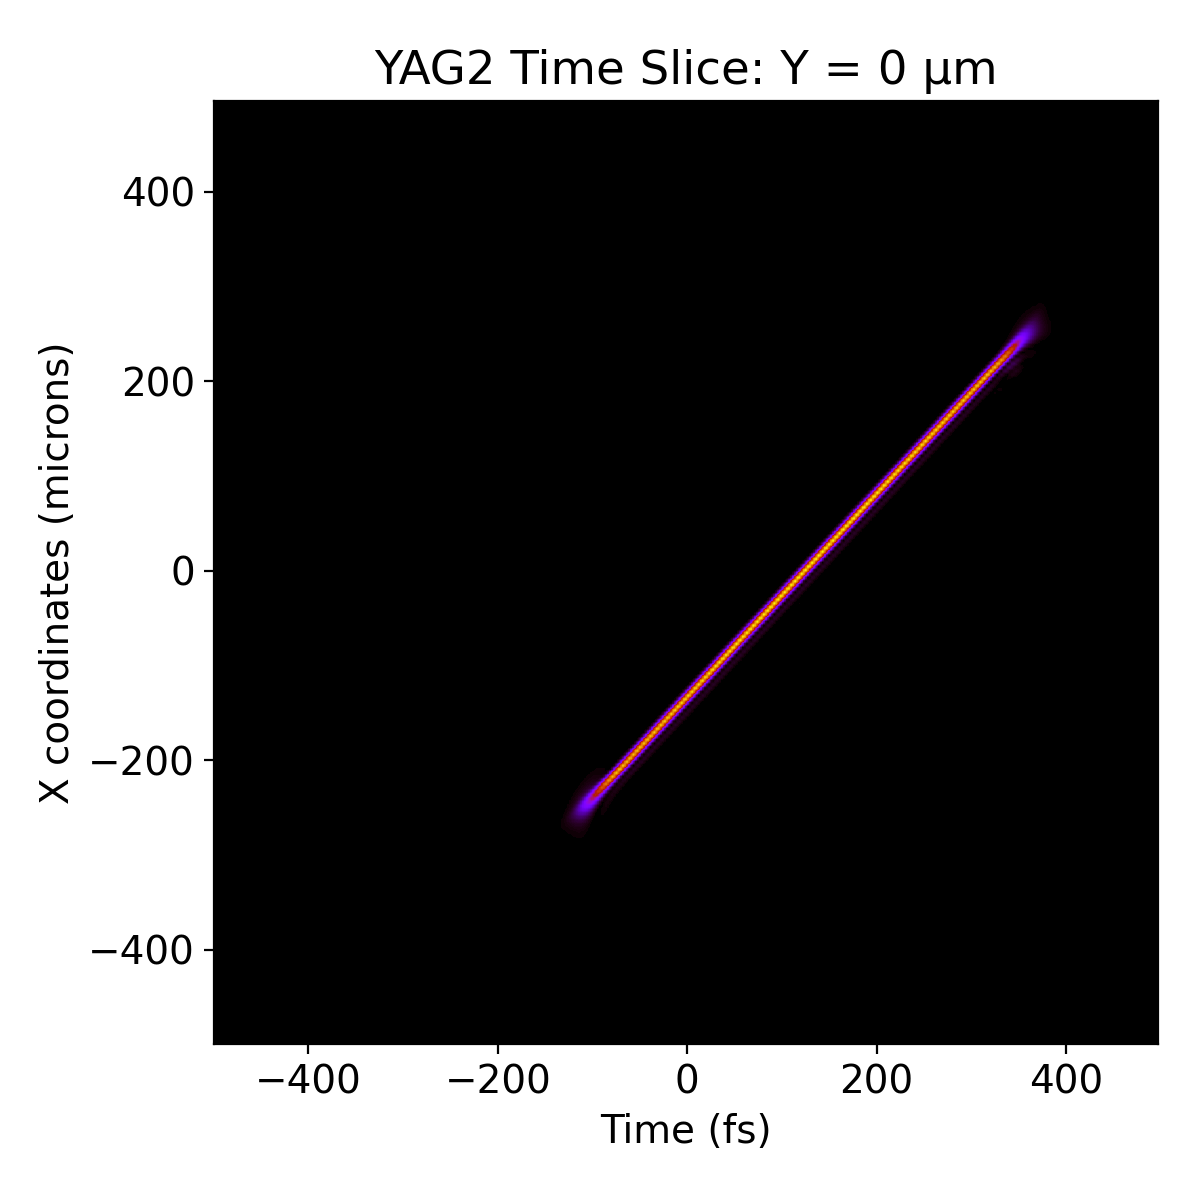

128


<IPython.core.display.Javascript object>


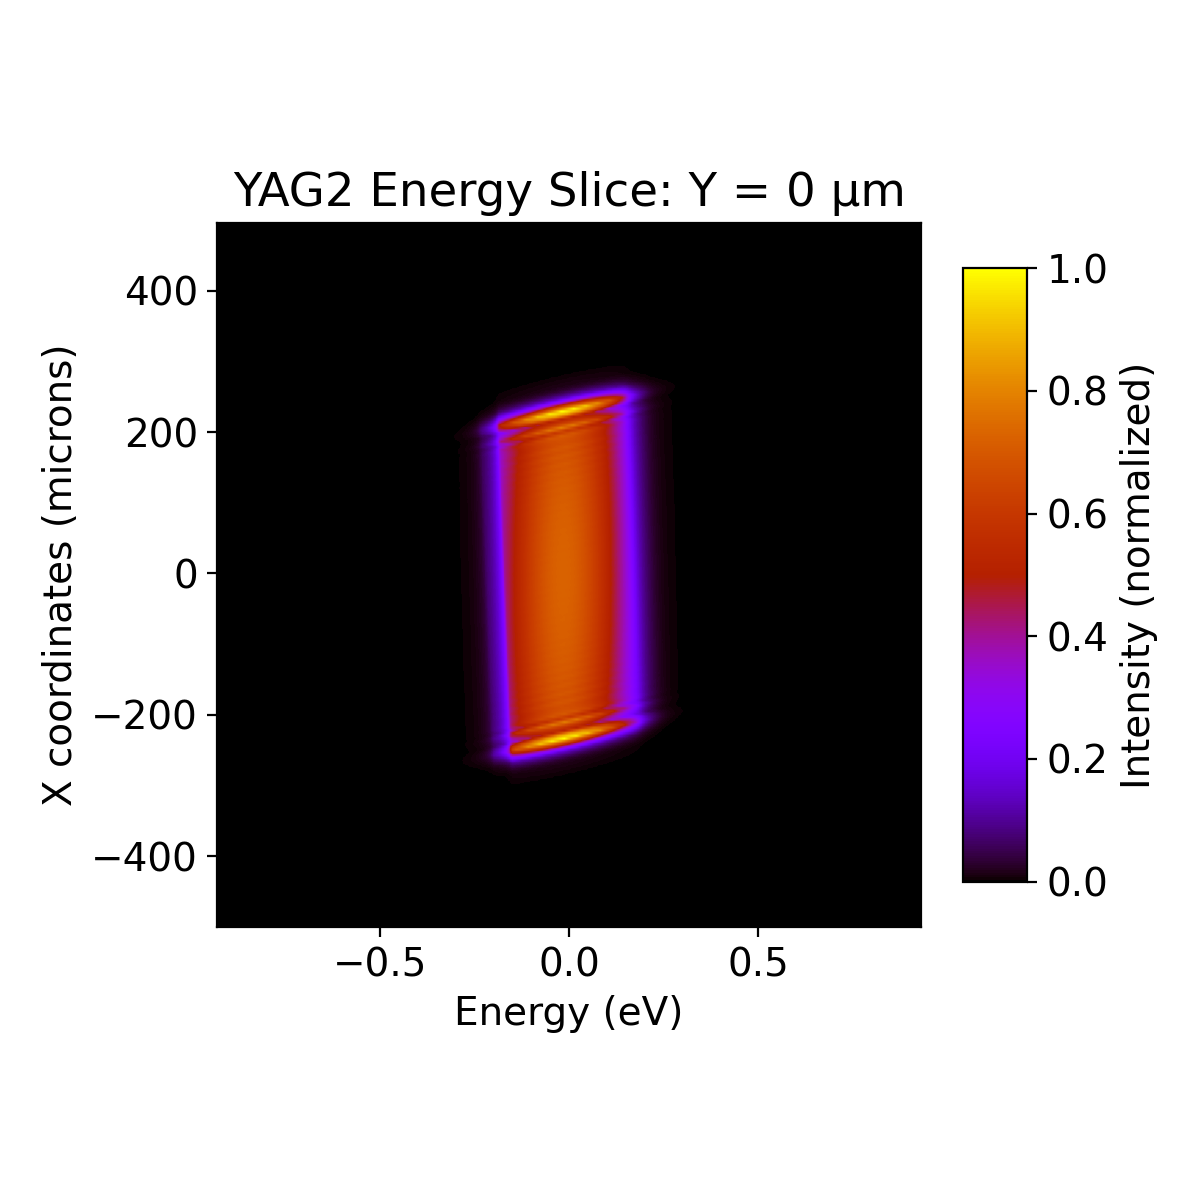

<IPython.core.display.Javascript object>


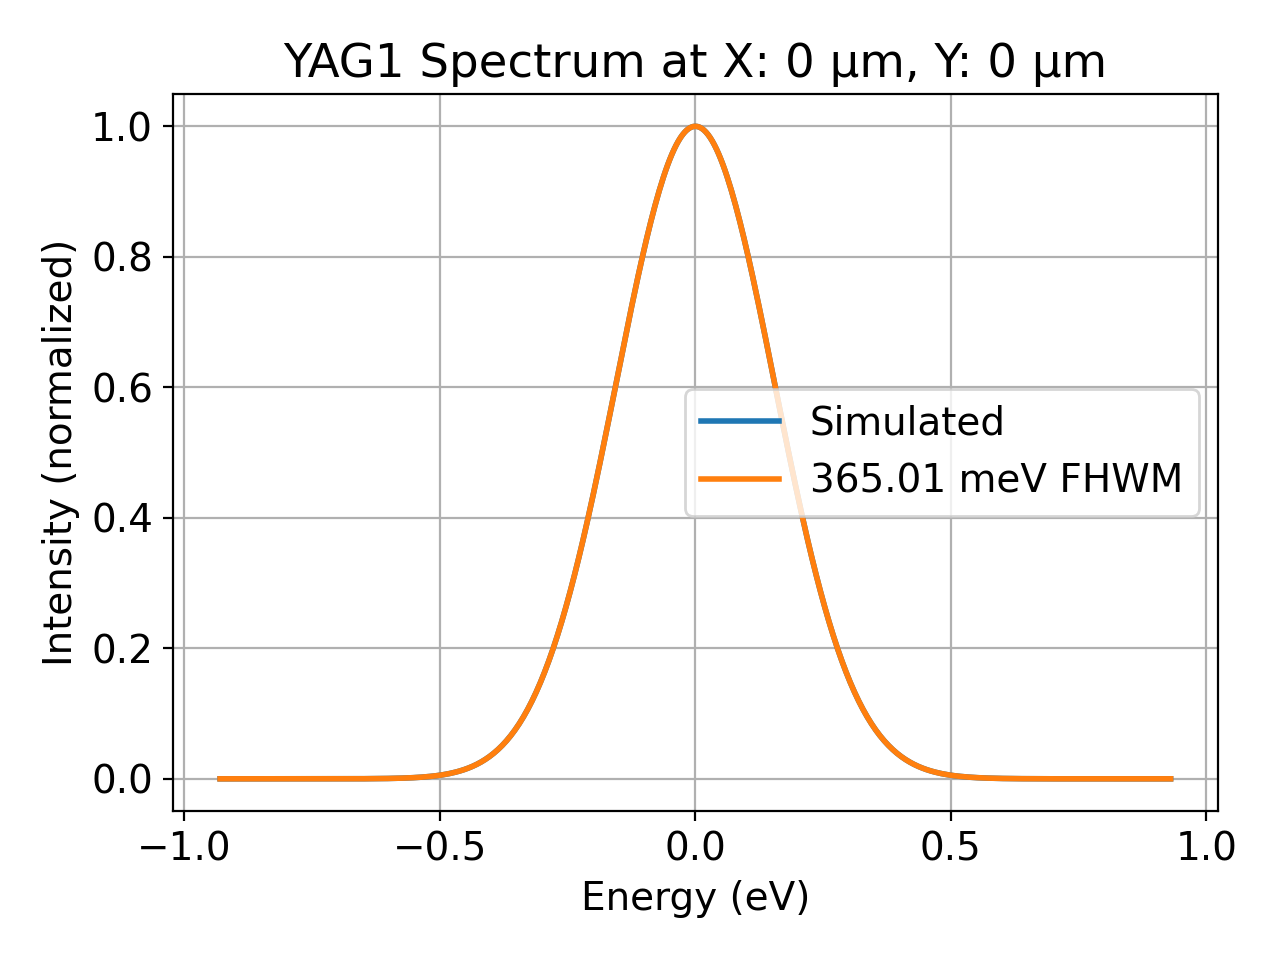

<IPython.core.display.Javascript object>


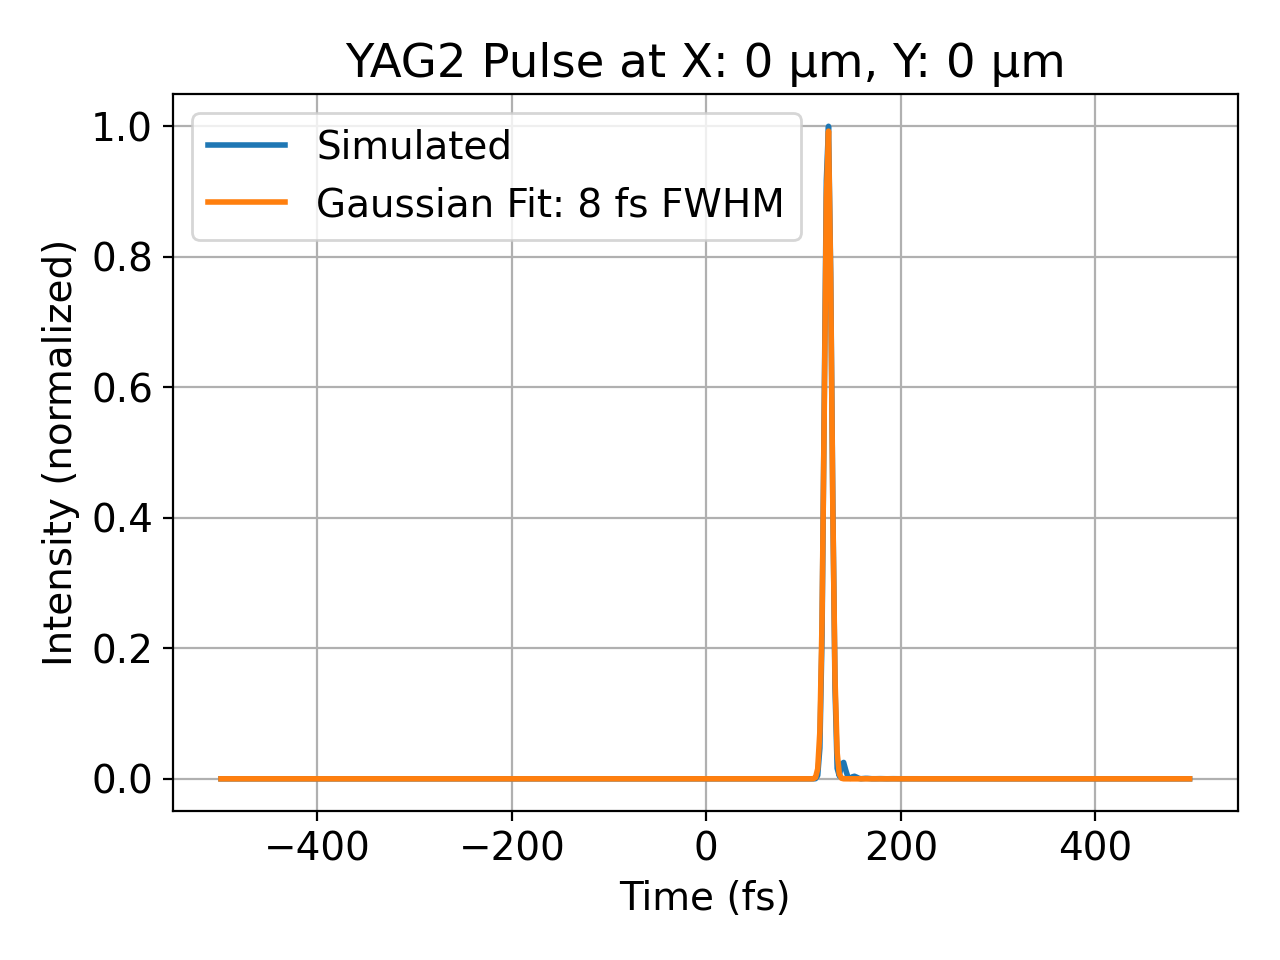

<IPython.core.display.Javascript object>


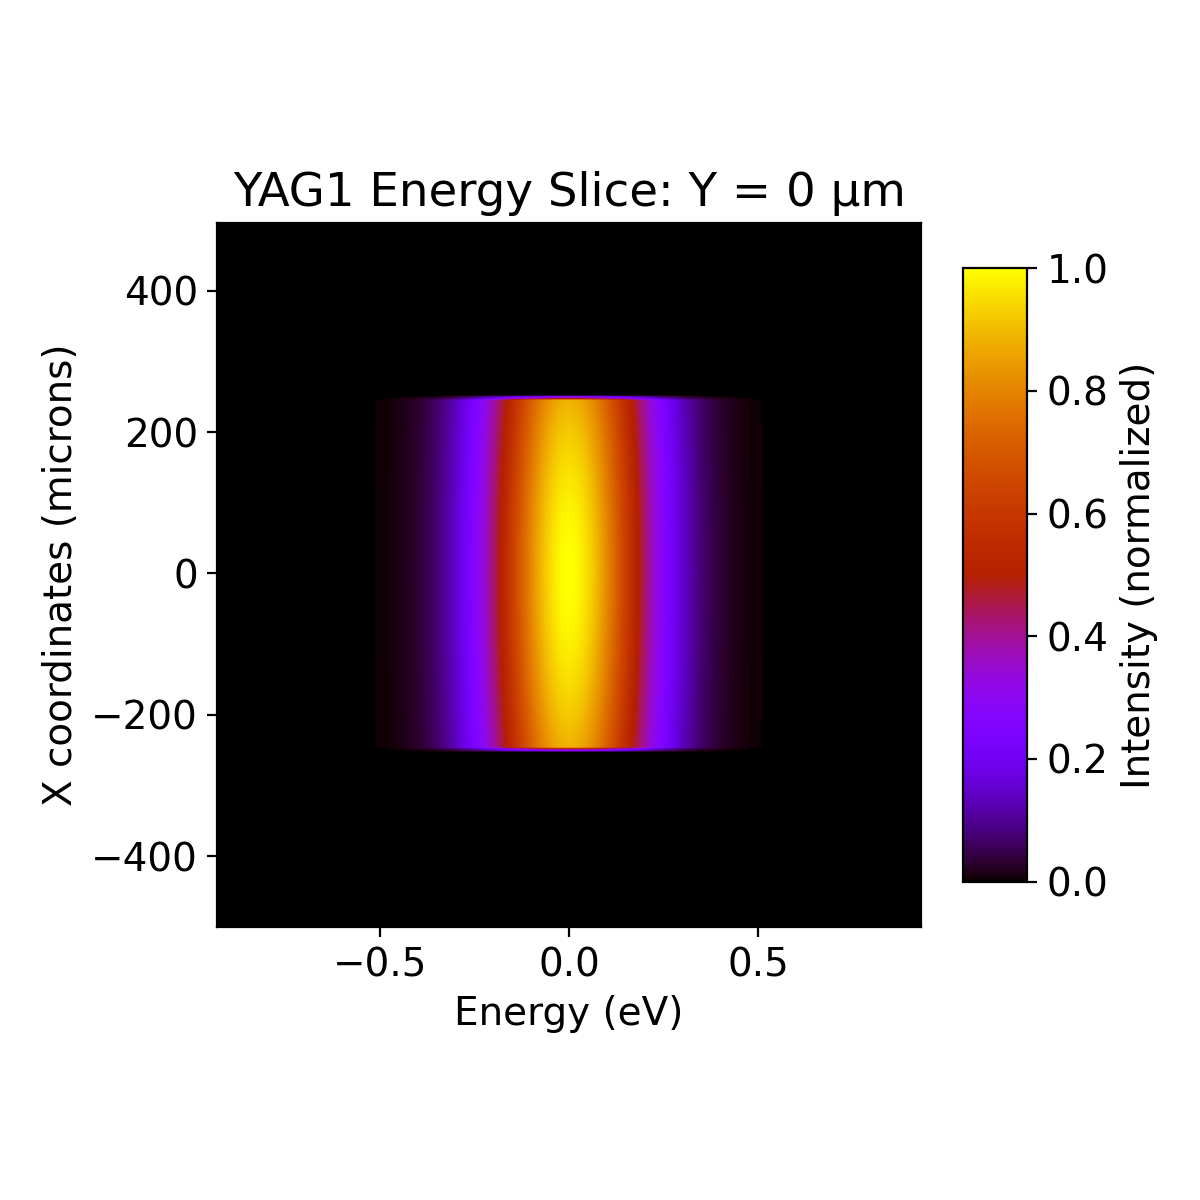

<IPython.core.display.Javascript object>


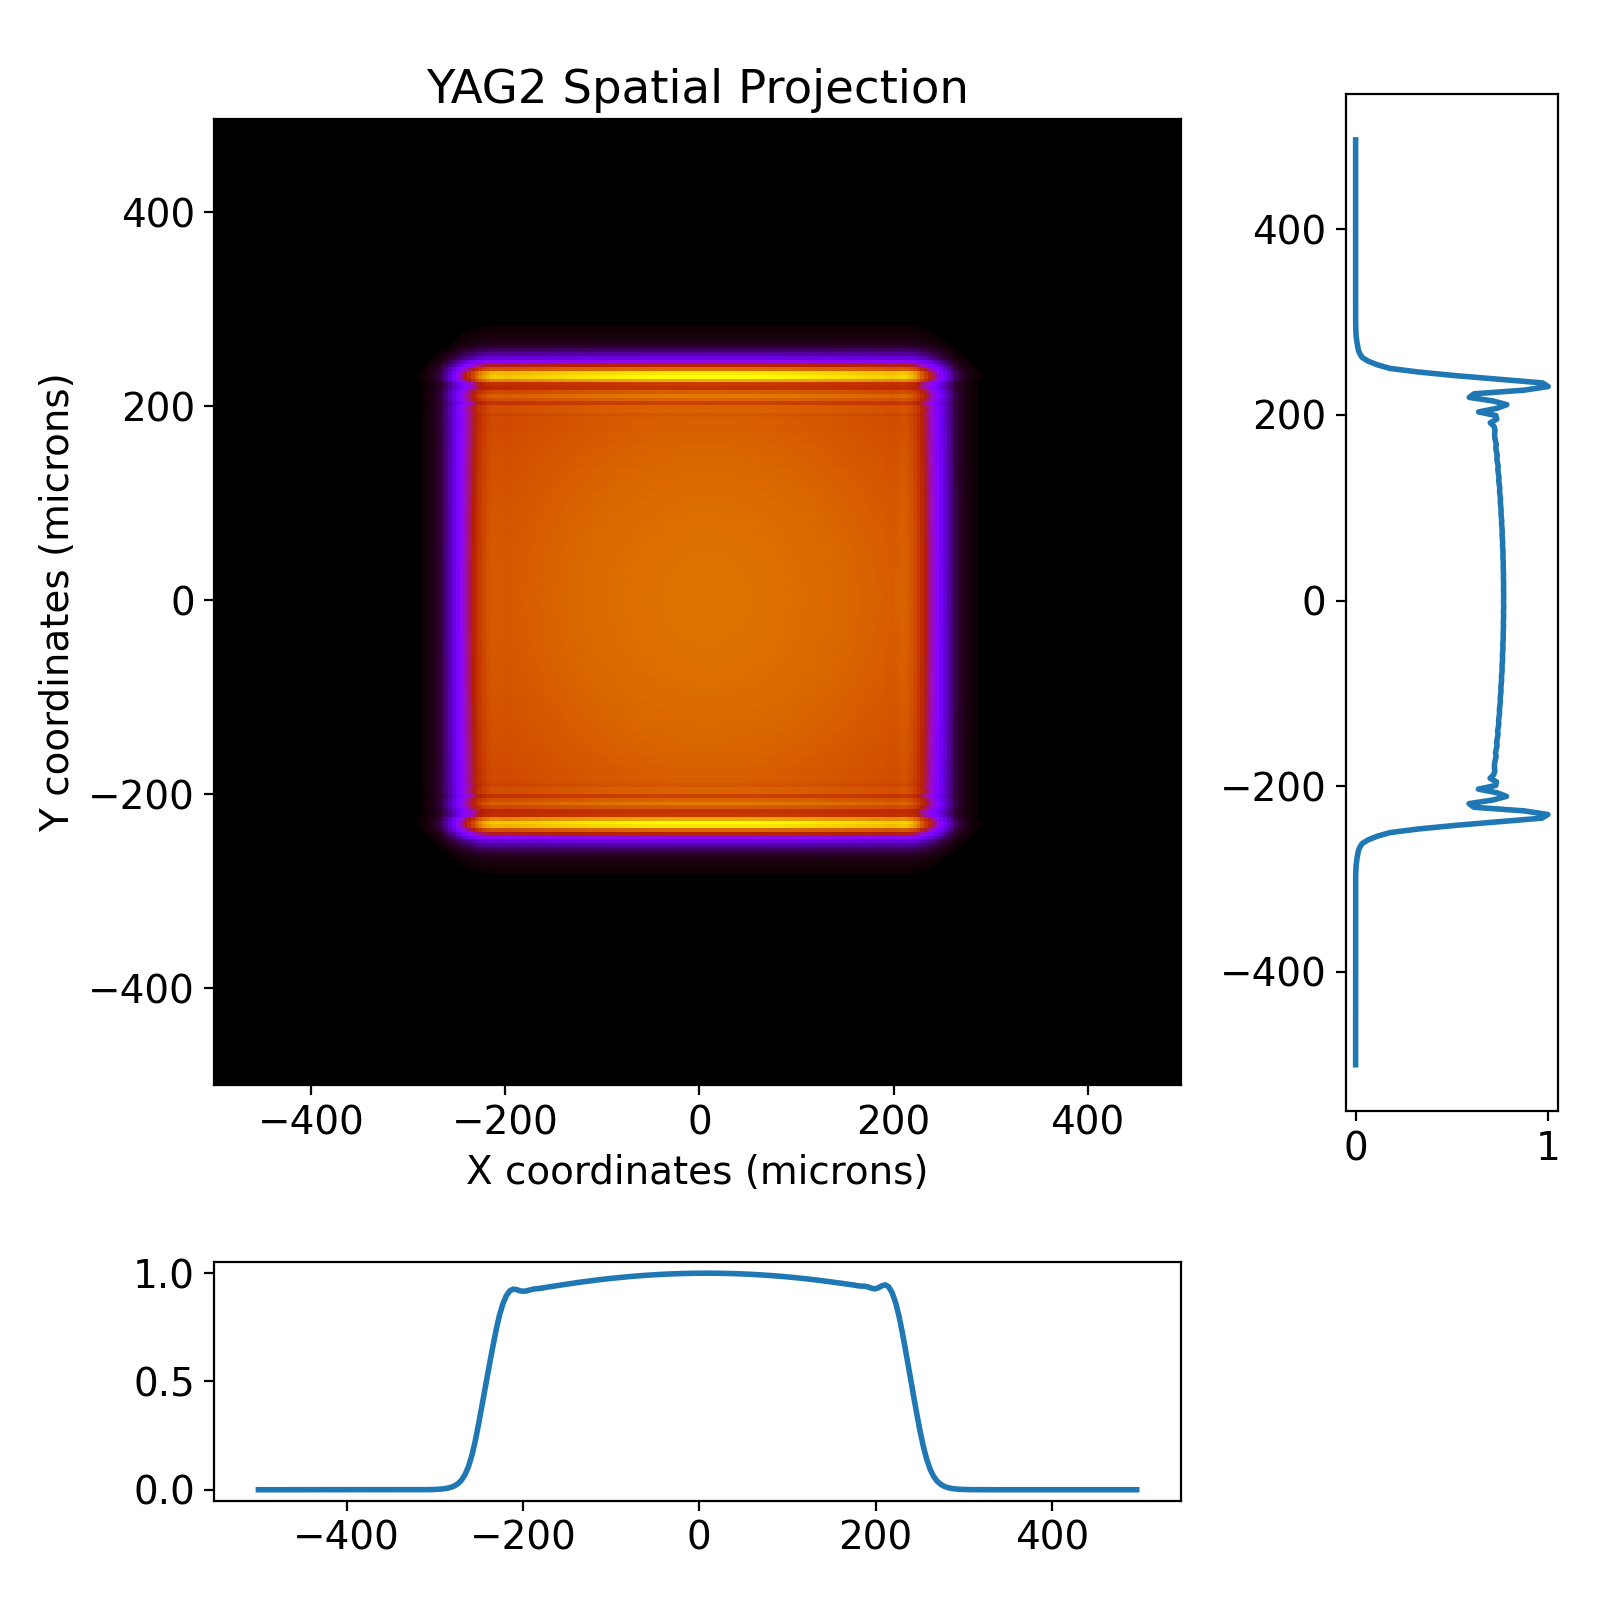

<IPython.core.display.Javascript object>


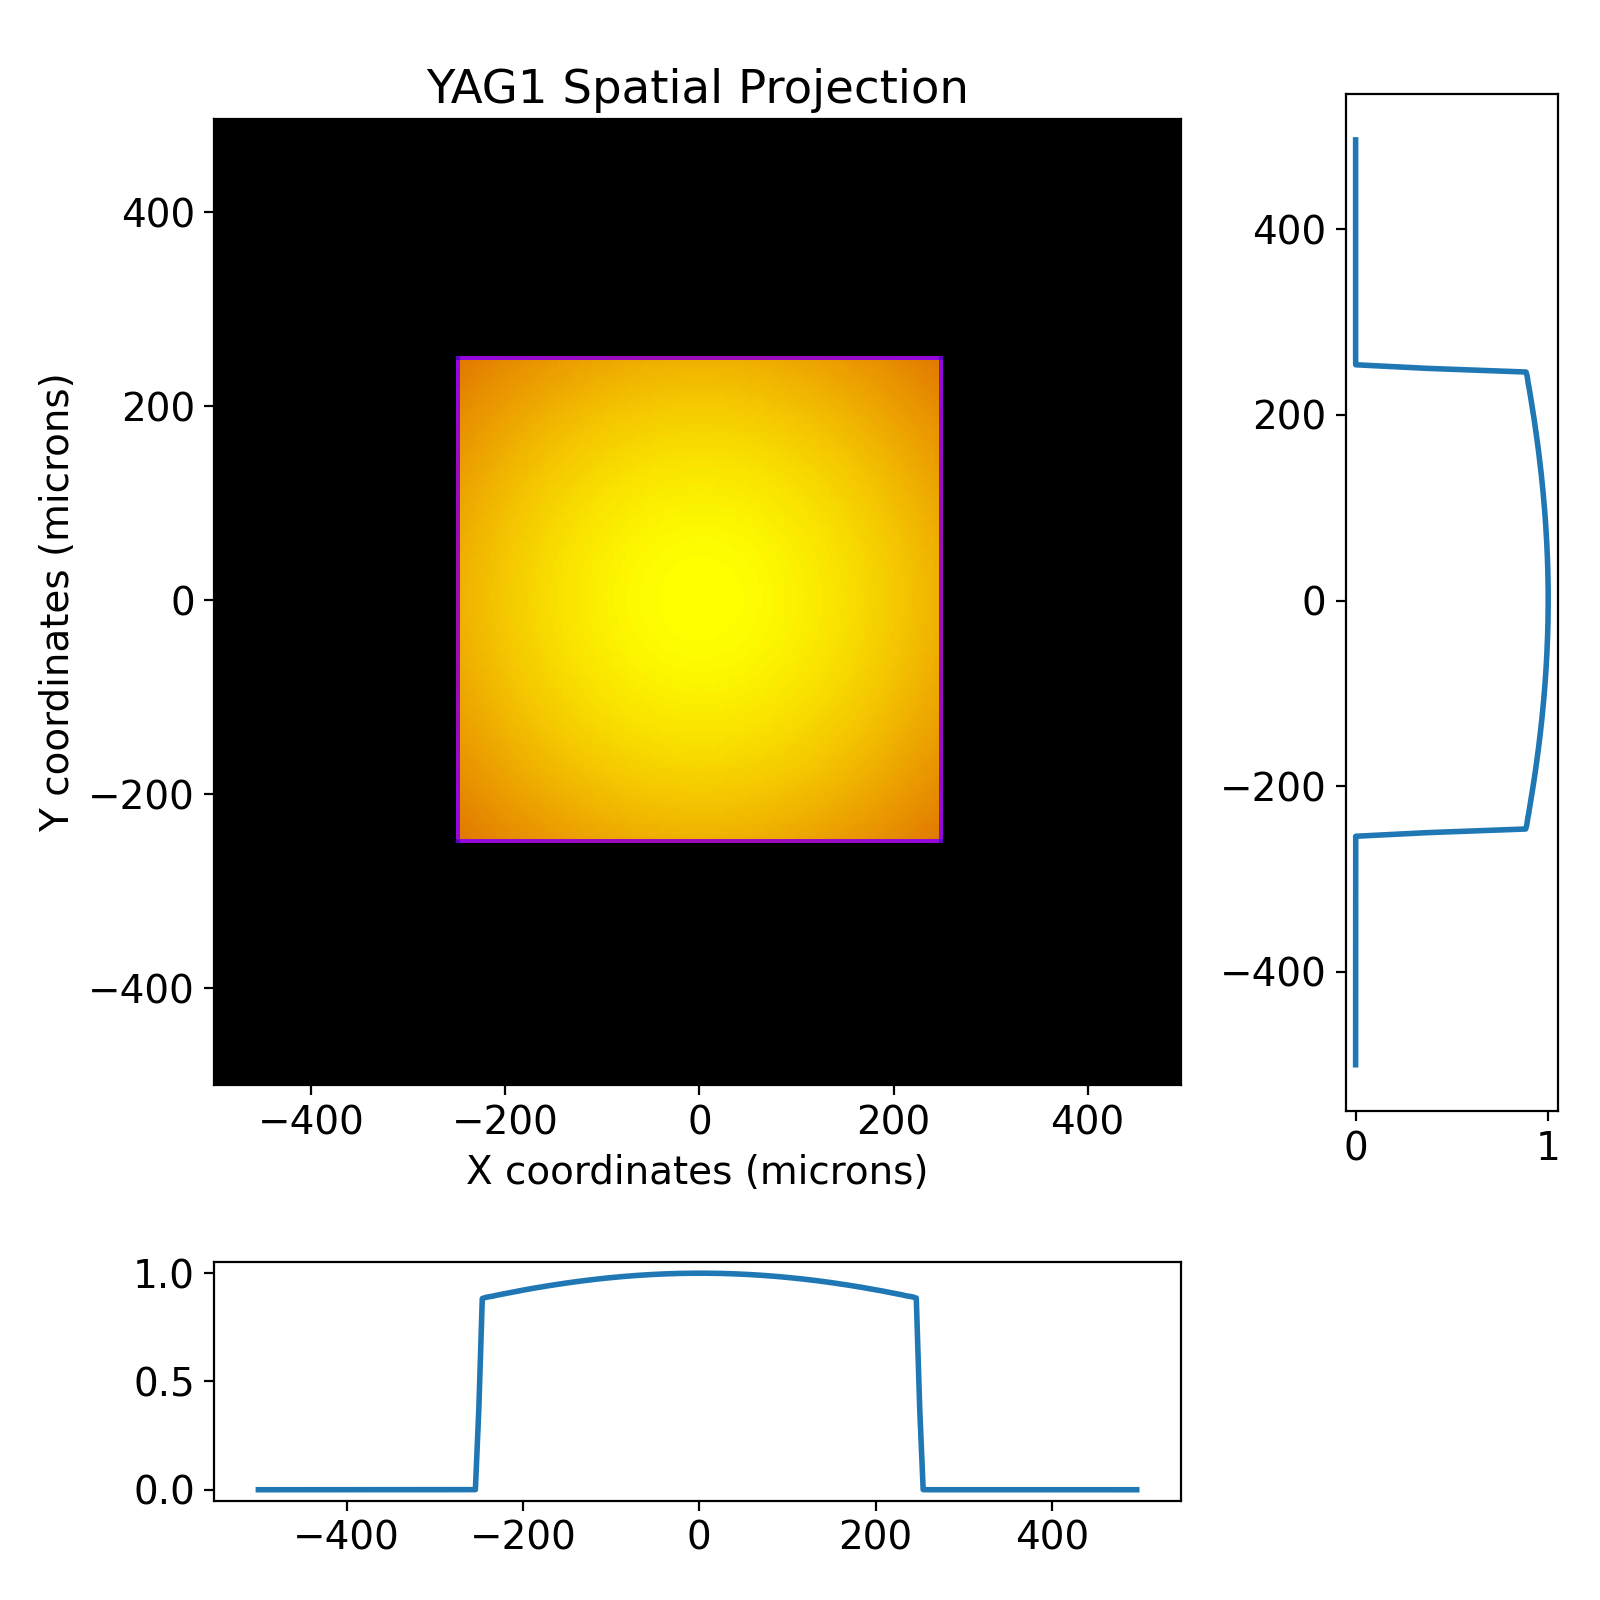

<IPython.core.display.Javascript object>


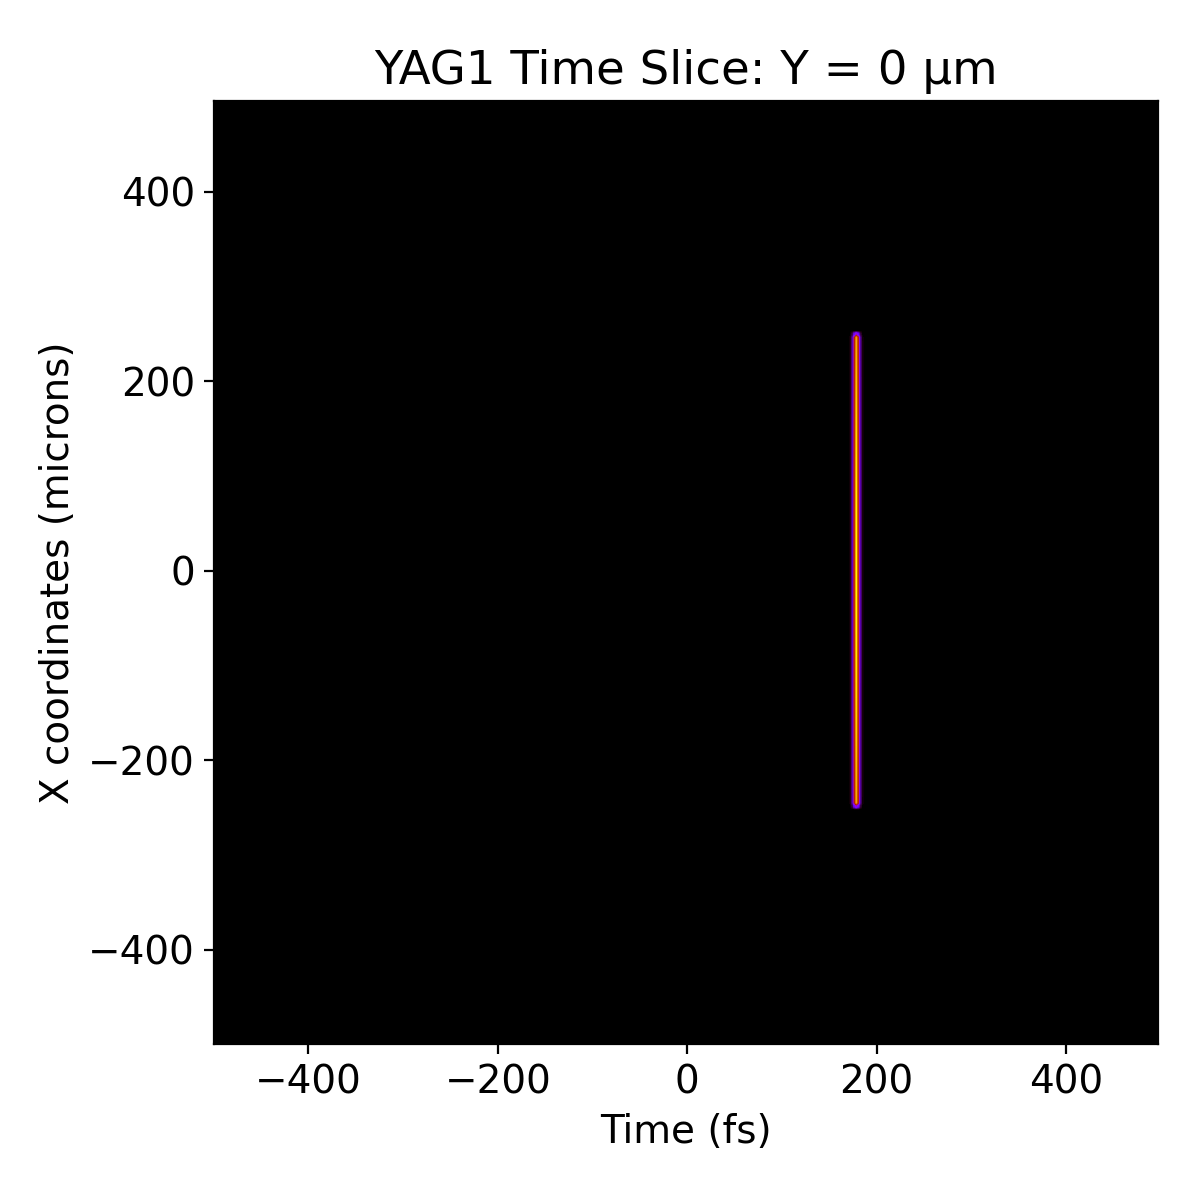

128


In [13]:
# pulse_test.imshow_time_slice('YAG_mid')
# pulse_test.imshow_energy_slice('YAG_mid')
# pulse_test.imshow_time_slice('YAG1')
pulse_test.imshow_time_slice('YAG2')
# pulse_test.imshow_energy_slice('YAG1')
pulse_test.imshow_energy_slice('YAG2')
# pulse_test.plot_spectrum('YAG1')
pulse_test.plot_spectrum('YAG1',x_pos=0)
# pulse_test.plot_pulse('YAG1')
pulse_test.plot_pulse('YAG2')
pulse_test.imshow_energy_slice('YAG1')
pulse_test.imshow_projection('YAG2')
pulse_test.imshow_projection('YAG1')
pulse_test.imshow_time_slice('YAG1')

<IPython.core.display.Javascript object>


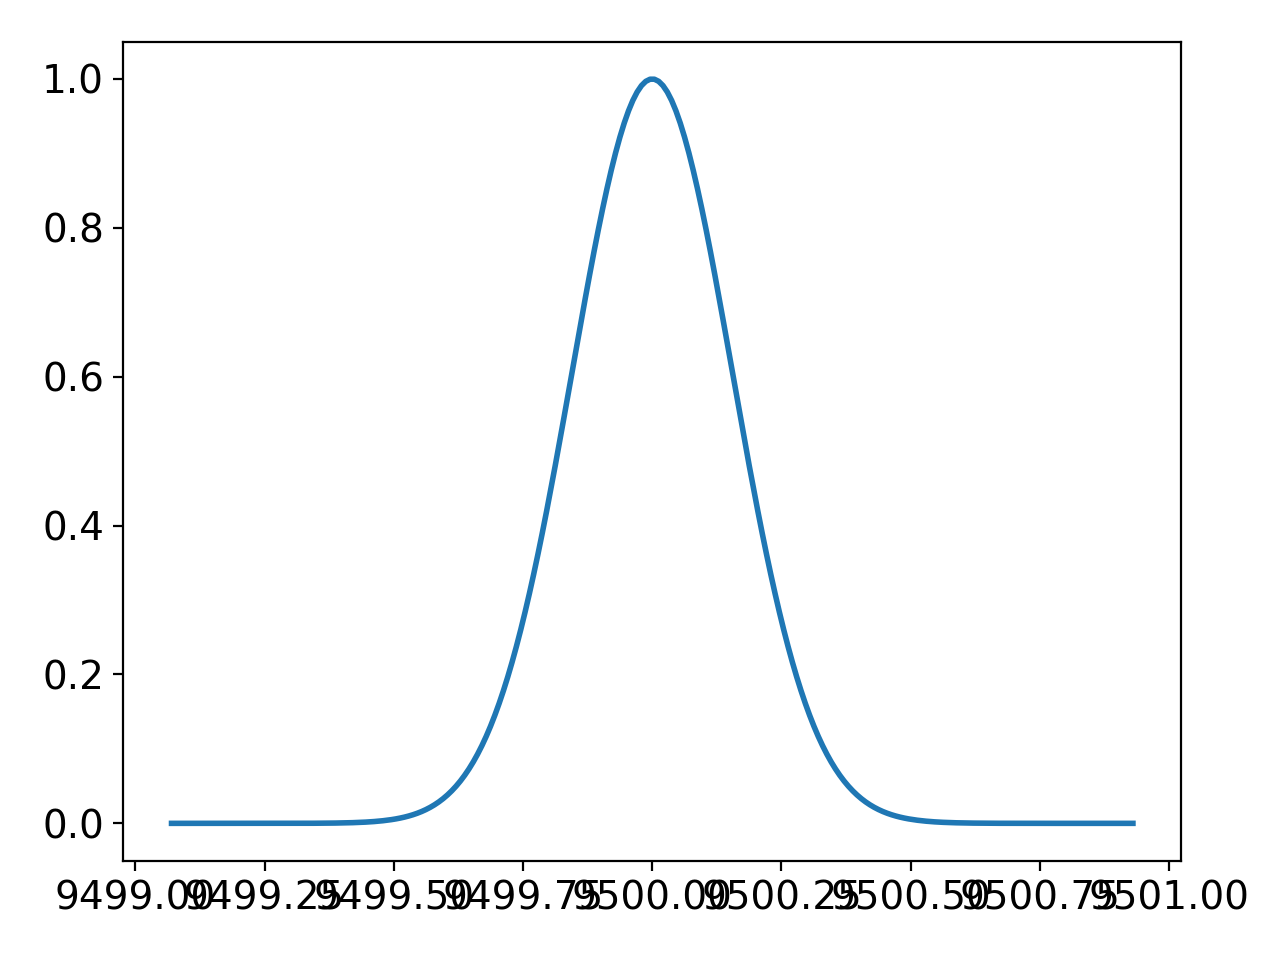

In [68]:
plt.figure()
plt.plot(pulse_test.energy,pulse_test.envelope**2)

In [8]:
(760-343)/180

2.316666666666667

In [33]:
(430-70)/350

1.0285714285714285

In [38]:
(430-90)/300

1.1333333333333333

In [16]:
(90+170)/480

0.5416666666666666

In [21]:
(680-512)/60

2.8